<b> 데이터분석 실무자와 빅데이터 인프라부터 데이터 분석 경험하기 </b> <br>
https://comento.kr/edu/schedule/1666


<b> 1주차 실습과제 </b>

▪ <b>주제: </b> 
<u>데이터 구조 파악</u> 및 <u>데이터에 대한 기본 정보 추출 (탐색적 데이터 분석) </u>

▪ <b>내용: </b>

실제 업무 기준으로 진행되는 프로세스에 따라 참여자분들이 실제 데이터 분석 프로젝트에 투입되었다는 가정하에 최초 수행되는 작업입니다. <u>제공되는 데이터를 대상으로 <b>기초통계</b> 및 <b>데이터 자체에 대한 의미 파악 및 분석 업무</b></u>를 수행합니다. 해당 과제 진행에 있어서 요구되는 내용은 다음과 같습니다.

1) 제공되고 있는 데이터에 대한 <b>기본 구조 및 현황 파악</b>
2) 데이터에 대한 각 <b>속성별 특징 및 파악되고 있는 데이터 성격 내용 정리</b>

▪ <b>작성 방법: </b> 
PPT 작성, 양식 자유, 최대 10페이지(간지 불요) 

▪ 수행 중 질문사항은 오픈카톡방을 통해서 질문해주세요.

## 목차

<b> Part 1. Import & Data Check </b>

- 데이터셋 불러오기 및 데이터 확인
- 이상치 탐색 및 제거
- 결측 데이터 확인 및 처리

<b> Part 2. EDA </b>
- 타겟 변수 확인
- Numerical Data 탐색
- Categorical Data 탐색

<b> Part 3. Feature Engineering </b>

- Log 변환
- 결측 데이터 처리
- 유의하지 않은 변수 삭제
- Categorical Data 수치형 변환
- 새로운 변수 생성

<b> Part 4. Modeling & make submission </b>

- Model: XGBoost
- Submission
 
 
<b> Reference </b> <br>
https://hong-yp-ml-records.tistory.com/2 [HONG YP's Data Science BLOG] <br>
https://m.blog.naver.com/paulcyp/221719994932 <br>
https://mjs1995.tistory.com/64 <br>
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Modelling <br>
https://www.kaggle.com/fkstepz/step-by-step-house-prices-prediction <br>
https://www.kaggle.com/kongnyooong/house-price-tutorial-for-korean-beginners <br>
https://www.kaggle.com/munmun2004/house-prices-for-begginers <br>
https://jamm-notnull.tistory.com/12 <br>


## 1. Import & Data Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from collections import Counter

pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head(10)

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

81개 열, 1460개 데이터

In [3]:
categorical = train.dtypes[train.dtypes == "object"] #범주형 변수들
numerical = train.dtypes[train.dtypes != "object"] #연속형 변수들

print("Numerical Features : ", len(train.dtypes[train.dtypes == "object"]), "개")
print("Categorical Features : ", len(train.dtypes[train.dtypes != "object"]), "개")

Numerical Features :  43 개
Categorical Features :  38 개


### 데이터 불러오기 및 데이터 확인

- 미국 Iowa주 Ames city의 2006년 1월 ~2010년 7월 부동산 거래 데이터
- 81개의 열(Feature), 1460개의 행으로 이루어진 데이터셋
- 연속형 숫자 변수(Numerical Feature) 43개, 범주형 변수(서열/명명, Categorical Feature) 38개
- 한 행이 하나의 주택,그 주택의 거래에 대한 정보
- a) 거래 관련 정보, b) 주택 자체에 대한 정보, c) 주택 내부 요소들에 대한 정보, d) 주택의 외부 환경적 요소들에 대한 정보 변수들로 구성되어있음.
- 거래 및 주택에 대한 80개의 변수가 독립 변수, 나머지 하나인 SalePrice가 종속변수가 될 것으로 보임 







<b> Data Description </b>

|변수|설명|Dtype|
|:------|:---|:---|
|ID|각 부동산의 고유 번호|int64|
|MsSubClass|주택의 특성이나 주거 유형과 관련된 정보(건축연수, 층수, 스타일)|int64|
|MSZoning|주택의 용도지역(용지: 농업, 상업, 주거)|object|
|LotFrontage|근처 도로까지의 거리|float64|
|LotArea|토지면적|int64|
|Street|주택 진입 대로의 포장/비포장여부|object|
|Alley|주택 진입 도로/골목의 포장/비포장여부|object|
|LotShape|주택/토지 모양|object|
|LandContour|토지 평탄도/고저|object|
|Utilities|전기,가스,수도|object|
|LotConfig|주택이 위치한 도로/공간 형태|object|
|LandSlope|토지 경사도|object|
|Neighborhood|근처 동네|object|
|Condition1|여러 시설과의 접근성|object|
|Condition2|Condition1과 동일|object|
|BldgType|주거형태|object|
|HouseStyle|단층/복층/단독출입구|object|
|OverallQual|주택의 전반적인 자재/마감의 질|int64|
|OverallCond|주택의 전반적인 관리 상태|int64|
|YearBuilt|건축연도|int64|
|YearRemodAdd|리모델링연도|int64|
|RoofStyle|지붕 형태|object|
|RoofMatl|지붕 자재|object|
|Exterior1st|외벽 자재|object|
|Exterior2nd|외벽 자재|object|
|MasVnrType|외벽에 붙이는 석조/벽돌 자재|object|
|MasVnrArea|Masonry Veneer의 평방피트|object|
|ExterQual|외벽 자재의 질|object|
|ExterCond|외벽의 현재 상태|object|
|Foundation|주택 기초공사에 사용된 자재|object|
|BsmtQual|지하실 높이|object|
|BsmtCond|지하실 상태|object|
|BsmtExposure|Refers to walkout or garden level walls|object|
|BsmtFinType1|지하실 마감상태(잘 마감된 영역)|object|
|BsmtFinSF1|BsmtFinType1의 넓이|int64|
|BsmtFinType2|BsmtFinType1과 동일|object|
|BsmtFinSF2|BsmtFinType2의 넓이|object|
|BsmtUnfSF|지하실의 마감되지 않은 면적|int64|
|TotalBsmtSF|지하실 전체 면적|int64|
|Heating|난방 종류|object|
|HeatingQC|난방 잘 되는지|object|
|CentralAir|중앙에어컨|object|
|Electrical|전기시스템|object|
|1stFlrSF|1층 면적|int64|
|2ndFlrSF|2층 면적|int64|
|LowQualFinSF|마감이 덜 된 면적|int64|
|GrLivArea|지상 주거공간 면적|int64|
|BsmtFullBath|지하실 full bathroom 수|int64|
|BsmtHalfBath|지하실 half bathroom 수|int64|
|FullBath|지상 full bathroom 수|int64|
|HalfBath|지상 half bathroom 수|int64|
|HalfBath|지상 half bathroom 수|int64|
|BedroomAbvGr|지상의 침실 수|int64|
|KitchenAbvGr|지상의 부엌 수|int64|
|KitchenQual|부엌 상태|object|
|TotRmsAbvGrd|지상의 방 전체 수|int64|
|Functional|Home functionality|object|
|Fireplaces|벽난로 수|int64|
|FireplaceQu|벽난로 상태|object|
|GarageType|차고 위치|object|
|GarageYrBlt|차고 건축연도|float64|
|GarageFinish|차고 내부 마감상태|object|
|GarageCars|차고에 수용가능한 차 수|float64|
|GarageArea|차고 면적|float64|
|GarageQual|차고의 질|object|
|GarageCond|차고의 전반적인 관리상태|object|
|PavedDrive|도로의 포장여부|object|
|WoodDeckSF|Wood deck area in square feet|int64|
|OpenPorchSF|Open porch area in square feet|int64|
|EnclosedPorch|Enclosed porch area in square feet|int64|
|3SsnPorch|Three season porch area in square feet|int64|
|ScreenPorch|Screen porch area in square feet|int64|
|PoolArea|수영장 면적|int64|
|PoolQC|수영장 상태|object|
|Fence|울타리 질|object|
|MiscFeature|기타 잡다한 요소들|object|
|MiscVal|기타 잡다한 요소들의 환산가치|int64|
|MoSold|판매 월|int64|
|YrSold|판매 연도|int64|
|SaleType|주택 거래 타입|object|
|SalePrice|판매가격|int64|



In [4]:
# train.info()

- 각 변수들의 내용은 위와 같고,
- 크게 몇 가지 카테고리로 나눌 수 있었음.<br>
1) 주택 토지 <br>
2) 접근성 <br>
3) 연식(건축,리모델링 연도)<br>
4) 건축 자재 <br>
5) 유틸리티, 냉난방, 배전<br>
6) 주택 내부(화장실, 부엌, 침실, 방 수,벽난로) <br>
7) 외부 및 기타 (지하실,차고,베란다(porch),수영장, 울타리) <br>
8) 거래에 관련한 정보<br>

### 데이터셋의 변수들을 살펴보면서 발생한 문제점들 
- 전처리가 필요한 부분들 <br>
보다보니 발견한 문제점이 몇 가지 있었는데,


<b>1) 수치로 표현된 명목형 변수들</b><br>
- Quality나 Condition을 나타내는 변수들 중 Ex, Gd,TA 등 문자로 입력된 변수와 1,2,3등 숫자로 입력된 변수가 섞여있음 <br>
-> FE 시 레이블 인코딩 진행

In [5]:
train_clean1 = train

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [6]:
five_scale = ["ExterQual","ExterCond","BsmtQual","BsmtCond", "HeatingQC", "KitchenQual", 
       "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
train[five_scale]

ExterQual ExterCond BsmtQual BsmtCond HeatingQC KitchenQual FireplaceQu  \
0           Gd        TA       Gd       TA        Ex          Gd         NaN   
1           TA        TA       Gd       TA        Ex          TA          TA   
2           Gd        TA       Gd       TA        Ex          Gd          TA   
3           TA        TA       TA       Gd        Gd          Gd          Gd   
4           Gd        TA       Gd       TA        Ex          Gd          TA   
...        ...       ...      ...      ...       ...         ...         ...   
1455        TA        TA       Gd       TA        Ex          TA          TA   
1456        TA        TA       Gd       TA        TA          TA          TA   
1457        Ex        Gd       TA       Gd        Ex          Gd          Gd   
1458        TA        TA       TA       TA        Gd          Gd         NaN   
1459        Gd        TA       TA       TA        Gd          TA         NaN   

     GarageQual GarageCond PoolQC  
0            TA         TA    NaN  
1            TA         TA    NaN  
2            TA         TA    NaN  
3            TA         TA    NaN  
4            TA         TA    NaN  
...         ...        ...    ...  
1455         TA         TA    NaN  
1456         TA         TA    NaN  
1457         TA         TA    NaN  
1458         TA         TA    NaN  
1459         TA         TA    NaN  

[1460 rows x 10 columns]

### 이상치 탐색 및 제거

- 이상치 IQR방식으로 제거(1460중 122행 제거)

In [99]:
train_new = train
train_new.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [100]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    
    return multiple_outliers 

Outliers_to_drop = detect_outliers(train_new, 2, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])


# 출처: https: // hong-yp-ml-records.tistory.com/2?category = 818779 [HONG YP's Data Science BLOG]
#IQR(튜키의 방법)을 이용한 함수를 지정하여  탐색 기준을 잡습니다.
#지정된 함수를 사용하여 train 데이터의 이상치 탐색을 수행합니다.

In [101]:
#122개의 Outlier 
train_new.loc[Outliers_to_drop]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
93      94         190  C (all)         60.0     7200   Pave   NaN      Reg   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
172    173         160       RL         44.0     5306   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   
634    635          90       RL         64.0     6979   Pave   NaN      Reg   
910    911          90       RL         80.0    11600   Pave   NaN      Reg   
1292  1293          70       RM         60.0     6600   Pave   NaN      Reg   
912    913          30       RM         51.0     6120   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
48           Lvl    AllPub    Inside       Gtl      OldTown       Norm   
93           Lvl    AllPub    Corner       Gtl      OldTown       Norm   
125          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
165          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
172          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1350         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
634          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
910          Lvl    AllPub    Corner       Gtl        NAmes      Feedr   
1292         Lvl    AllPub    Corner       Gtl      OldTown       Norm   
912          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
48         Norm   2fmCon     2Story            4            5       1920   
93         Norm   2fmCon     2.5Unf            6            6       1910   
125        Norm   2fmCon     1.5Fin            6            8       1935   
165        Norm   2fmCon     1.5Fin            5            7       1940   
172        Norm   TwnhsE     2Story            7            7       1987   
...         ...      ...        ...          ...          ...        ...   
1350       Norm   Duplex     2Story            5            5       1969   
634        Norm   Duplex     SFoyer            6            5       1980   
910        Norm   Duplex     2Story            5            5       1960   
1292       Norm     1Fam     2Story            5            4       1892   
912        Norm     1Fam     1Story            5            7       1925   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
48            2008     Gable  CompShg     MetalSd     MetalSd       None   
93            1998       Hip  CompShg     MetalSd     MetalSd       None   
125           1982     Gable  CompShg     Wd Sdng     Wd Sdng       None   
165           1999     Gable  CompShg     Wd Sdng     Wd Sdng       None   
172           1987     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1350          1969     Gable  CompShg     MetalSd     MetalSd    BrkFace   
634           1980     Gable  CompShg     Plywood     Plywood       None   
910           1960     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1292          1965     Gable  CompShg     Wd Sdng     Wd Sdng       None   
912           1950     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
48           0.0        TA        TA     BrkTil       TA       TA   
93           0.0        TA        TA     BrkTil       TA       Fa   
125          0.0        TA        Fa     CBlock       TA       TA   
165          0.0        TA        Gd     BrkTil       TA       TA   

In [102]:
#Outlier 제거, 그러고 나니 1338개의 수치가 남음
train_new = train_new.drop(Outliers_to_drop, axis = 0).reset_index(drop=True) 
print(train.shape)
print(train_new.shape)

(1460, 81)
(1338, 81)


In [103]:
train_new.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1338.000000  1338.000000  1109.000000    1338.000000  1338.000000   
mean    730.668161    55.549327    69.180343    9733.218236     6.087444   
std     421.313539    40.500065    22.806198    5442.084042     1.345029   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     370.250000    20.000000    59.000000    7500.000000     5.000000   
50%     729.500000    50.000000    69.000000    9308.000000     6.000000   
75%    1096.750000    70.000000    80.000000   11329.000000     7.000000   
max    1460.000000   190.000000   313.000000  115149.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1338.000000  1338.000000   1338.000000  1331.000000  1338.000000   
mean      5.552317  1972.748132   1985.053064   100.069872   432.337818   
std       1.041703    29.303816     20.743784   172.177462   419.432180   
min       1.000000  1880.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1975.000000   1994.000000     0.000000   384.500000   
75%       6.000000  2001.000000   2004.000000   162.500000   705.750000   
max       9.000000  2010.000000   2010.000000  1600.000000  1696.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     38.298954   565.338565  1035.975336  1133.307922   326.405830   
std     148.728267   433.767320   387.247933   343.114870   415.360885   
min       0.000000     0.000000     0.000000   438.000000     0.000000   
25%       0.000000   225.500000   794.250000   866.000000     0.000000   
50%       0.000000   482.000000   979.500000  1070.000000     0.000000   
75%       0.000000   807.500000  1268.000000  1352.000000   709.000000   
max    1474.000000  2153.000000  3206.000000  2633.000000  1796.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1338.000000  1338.000000   1338.000000   1338.000000  1338.000000   
mean       2.982063  1462.695815      0.419283      0.044096     1.541854   
std       33.246384   449.748457      0.511486      0.212543     0.527590   
min        0.000000   438.000000      0.000000      0.000000     0.000000   
25%        0.000000  1120.000000      0.000000      0.000000     1.000000   
50%        0.000000  1433.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max      528.000000  3627.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1338.000000   1338.000000   1338.000000   1338.000000  1338.000000   
mean      0.383408      2.816891      1.031390      6.368460     0.588191   
std       0.501540      0.741009      0.182809      1.451626     0.623699   
min       0.000000      0.000000      0.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     11.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1273.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean   1978.868028     1.757848   466.638266    90.140508    42.932735   
std      24.740125     0.721267   202.268694   117.299180    58.894325   
min    1906.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   324.250000     0.000000     0.000000   
50%    1980.000000     2.000000   474.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   168.000000    64.000000   
max    2

### 4) 결측치 탐색 및 제거 

In [104]:
#결측치 처리
null_data = train_new.isnull().sum().to_frame().reset_index()
null_data.columns = ["feature", "null_count"]
null_data = null_data[null_data["null_count"] > 0].reset_index().sort_values(by="null_count", ascending = False)
null_data

index       feature  null_count
16     72        PoolQC        1336
18     74   MiscFeature        1300
1       6         Alley        1259
17     73         Fence        1083
10     57   FireplaceQu         646
0       3   LotFrontage         229
11     58    GarageType          65
12     59   GarageYrBlt          65
13     60  GarageFinish          65
14     63    GarageQual          65
15     64    GarageCond          65
6      32  BsmtExposure          32
8      35  BsmtFinType2          32
7      33  BsmtFinType1          31
5      31      BsmtCond          31
4      30      BsmtQual          31
3      26    MasVnrArea           7
2      25    MasVnrType           7
9      42    Electrical           1

- 81개 중 18개의 변수는 null값이 있어서 결측치 처리가 필요함
- 가장 결측치가 많은 변수는 PoolQc, MiscFeature
- 숫자형 변수 3개, 나머지는 다 범주형 변수

In [105]:
train_new[null_data["feature"].to_list()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        2 non-null      object 
 1   MiscFeature   38 non-null     object 
 2   Alley         79 non-null     object 
 3   Fence         255 non-null    object 
 4   FireplaceQu   692 non-null    object 
 5   LotFrontage   1109 non-null   float64
 6   GarageType    1273 non-null   object 
 7   GarageYrBlt   1273 non-null   float64
 8   GarageFinish  1273 non-null   object 
 9   GarageQual    1273 non-null   object 
 10  GarageCond    1273 non-null   object 
 11  BsmtExposure  1306 non-null   object 
 12  BsmtFinType2  1306 non-null   object 
 13  BsmtFinType1  1307 non-null   object 
 14  BsmtCond      1307 non-null   object 
 15  BsmtQual      1307 non-null   object 
 16  MasVnrArea    1331 non-null   float64
 17  MasVnrType    1331 non-null   object 
 18  Electrical    1337 non-null 

<b> 결측치 처리 1 - 범주형 변수 </b>
 - 수영장이나 복도, 벽난로, 차고, 지하실 등의 시설은 없을 수 있으므로 결측치 데이터는 없다고 가정하고 'None'으로 처리

In [106]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
            'BsmtCond', 'MasVnrType', 'Electrical'):
    train_new[col] = train_new[col].fillna('None')

<b> 결측치 처리 2 - 수치형 변수 </b>

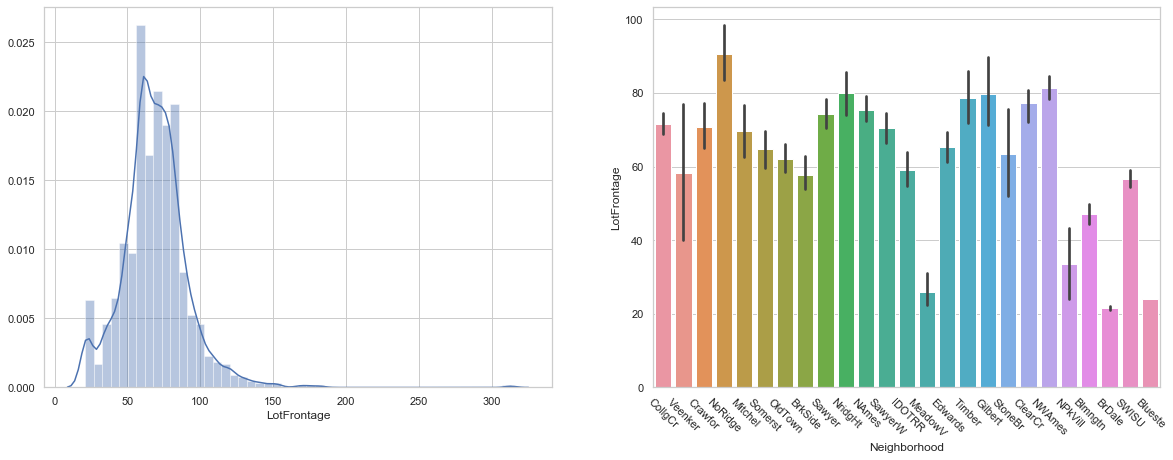

In [107]:
# lotFrontage는 근처 도로까지의 거리/면적. 300이 넘는 값들이 있어서 평균보다는 neighborhood별 중앙값으로 처리해 줌
fig, ax = plt.subplots(1, 2, figsize=(20, 7)) 

sns.distplot(train_new['LotFrontage'], ax = ax[0])

plt.xticks(rotation = - 45 )
sns.barplot(x='Neighborhood', y="LotFrontage", data=train_new, ax = ax[1])

In [108]:
train_new['LotFrontage'] = train_new.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [109]:
#GarageYrBlt가 결측값인 경우 차고 관련 다른 값들도 모두 결측이었으므로 차고가 없는 경우라고 가정하고 0으로 처리
train_new.loc[train_new['GarageYrBlt'].isnull() == True, ['GarageYrBlt','GarageArea','GarageCond','GarageType', 'GarageFinish','GarageQual', 'GarageCond']]

GarageYrBlt  GarageArea GarageCond GarageType GarageFinish GarageQual  \
37            NaN           0       None       None         None       None   
73            NaN           0       None       None         None       None   
83            NaN           0       None       None         None       None   
92            NaN           0       None       None         None       None   
101           NaN           0       None       None         None       None   
...           ...         ...        ...        ...          ...        ...   
1224          NaN           0       None       None         None       None   
1288          NaN           0       None       None         None       None   
1327          NaN           0       None       None         None       None   
1328          NaN           0       None       None         None       None   
1331          NaN           0       None       None         None       None   

     GarageCond  
37         None  
73         None  
83         None  
92         None  
101        None  
...         ...  
1224       None  
1288       None  
1327       None  
1328       None  
1331       None  

[65 rows x 7 columns]

In [110]:
train_new['GarageYrBlt'] = train_new['GarageYrBlt'].fillna(0)

In [111]:
#MasVnrArea도 마찬가지로 MasVnrType과 동일한 레코드들이 결측이므로 없다고 간주하고 0으로 처리
print(train_new.loc[train_new['MasVnrArea'].isnull() == True, ['MasVnrArea','MasVnrType']])
train_new['MasVnrArea'] = train_new['MasVnrArea'].fillna(0)

      MasVnrArea MasVnrType
211          NaN       None
598          NaN       None
858          NaN       None
892          NaN       None
896          NaN       None
1139         NaN       None
1171         NaN       None


In [112]:
null_check = train_new.isnull().sum().to_frame().reset_index()
null_check.sort_values(by=0,ascending = False)
#이제 null값 없음!

index  0
0            Id  0
41   CentralAir  0
59  GarageYrBlt  0
58   GarageType  0
57  FireplaceQu  0
..          ... ..
26   MasVnrArea  0
25   MasVnrType  0
24  Exterior2nd  0
23  Exterior1st  0
80    SalePrice  0

[81 rows x 2 columns]

## Exploratory Data Analysis
1. 이 동네의 집값은 어떤 분포로 이루어져 있을까?

2. 이 집값은 어떤 변수에 따라 어떻게 변할까? - 큰 범주별

3. 이 데이터를 통해 어떤 문제를 풀 것인가?

### 타겟변수 확인 - SalePrice

In [113]:
train_new['SalePrice'].describe()

count      1338.000000
mean     176877.275037
std       70336.858965
min       34900.000000
25%      129900.000000
50%      161500.000000
75%      210000.000000
max      625000.000000
Name: SalePrice, dtype: float64

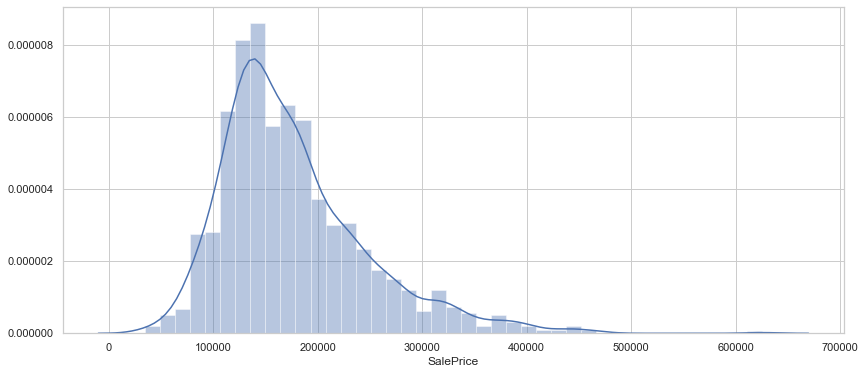

In [114]:
fig=plt.gcf()  
fig.set_size_inches(14,6)
sns.distplot(train_new['SalePrice'])

- Ames city의 집값은 우편포된 분포로 대부분 200,000달러 밑으로 분포해있다 (skewed to right)
- 중앙값 163,000, 평균 180,921 (한화로 약 2억 1천만원)
- 300,000달러가 넘는 비싼 집일수록 큰 편차로 분포, 최솟값은 34,900이고 최댓값은 755,000
- 연도별 집값을 평균치로만 보면 2007년 최고점($186,063)을 찍고 감소하는 추이
- 주택 거래량은 2008년을 제외하고는 증가하는 추세이지만 2010년은 하반기 데이터가 없어서 확인 불가능

### 1) Numerical Data

In [115]:
train[numerical.index]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

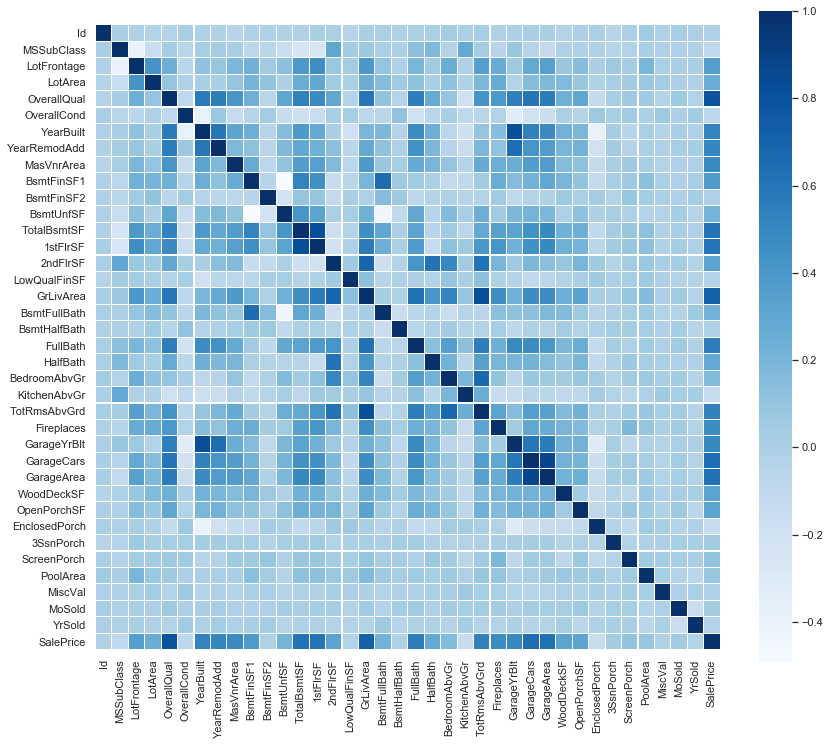

In [116]:
f,ax = plt.subplots(figsize = (14,12))
sns.heatmap(train[numerical.index].corr(),square = True,linewidths = 0.1, cmap = 'Blues', linecolor = "white")

##### 1) Y변수(가격)와 상관이 높은 변수

In [117]:
corr_table = train.corr()
corr_table['SalePrice_abs'] = corr_table['SalePrice'].abs()
# corr_table[['SalePrice','SalePrice_abs']].sort_values(by="SalePrice_abs", ascending = False)
corr_table.loc[corr_table['SalePrice_abs'] > 0.5,['SalePrice','SalePrice_abs']].sort_values(by='SalePrice_abs', ascending = False)

SalePrice  SalePrice_abs
SalePrice      1.000000       1.000000
OverallQual    0.790982       0.790982
GrLivArea      0.708624       0.708624
GarageCars     0.640409       0.640409
GarageArea     0.623431       0.623431
TotalBsmtSF    0.613581       0.613581
1stFlrSF       0.605852       0.605852
FullBath       0.560664       0.560664
TotRmsAbvGrd   0.533723       0.533723
YearBuilt      0.522897       0.522897
YearRemodAdd   0.507101       0.507101

SalePrice와 상관이 높아보이는 10개의 변수를 가지고 다시 pairplot을 그려봄

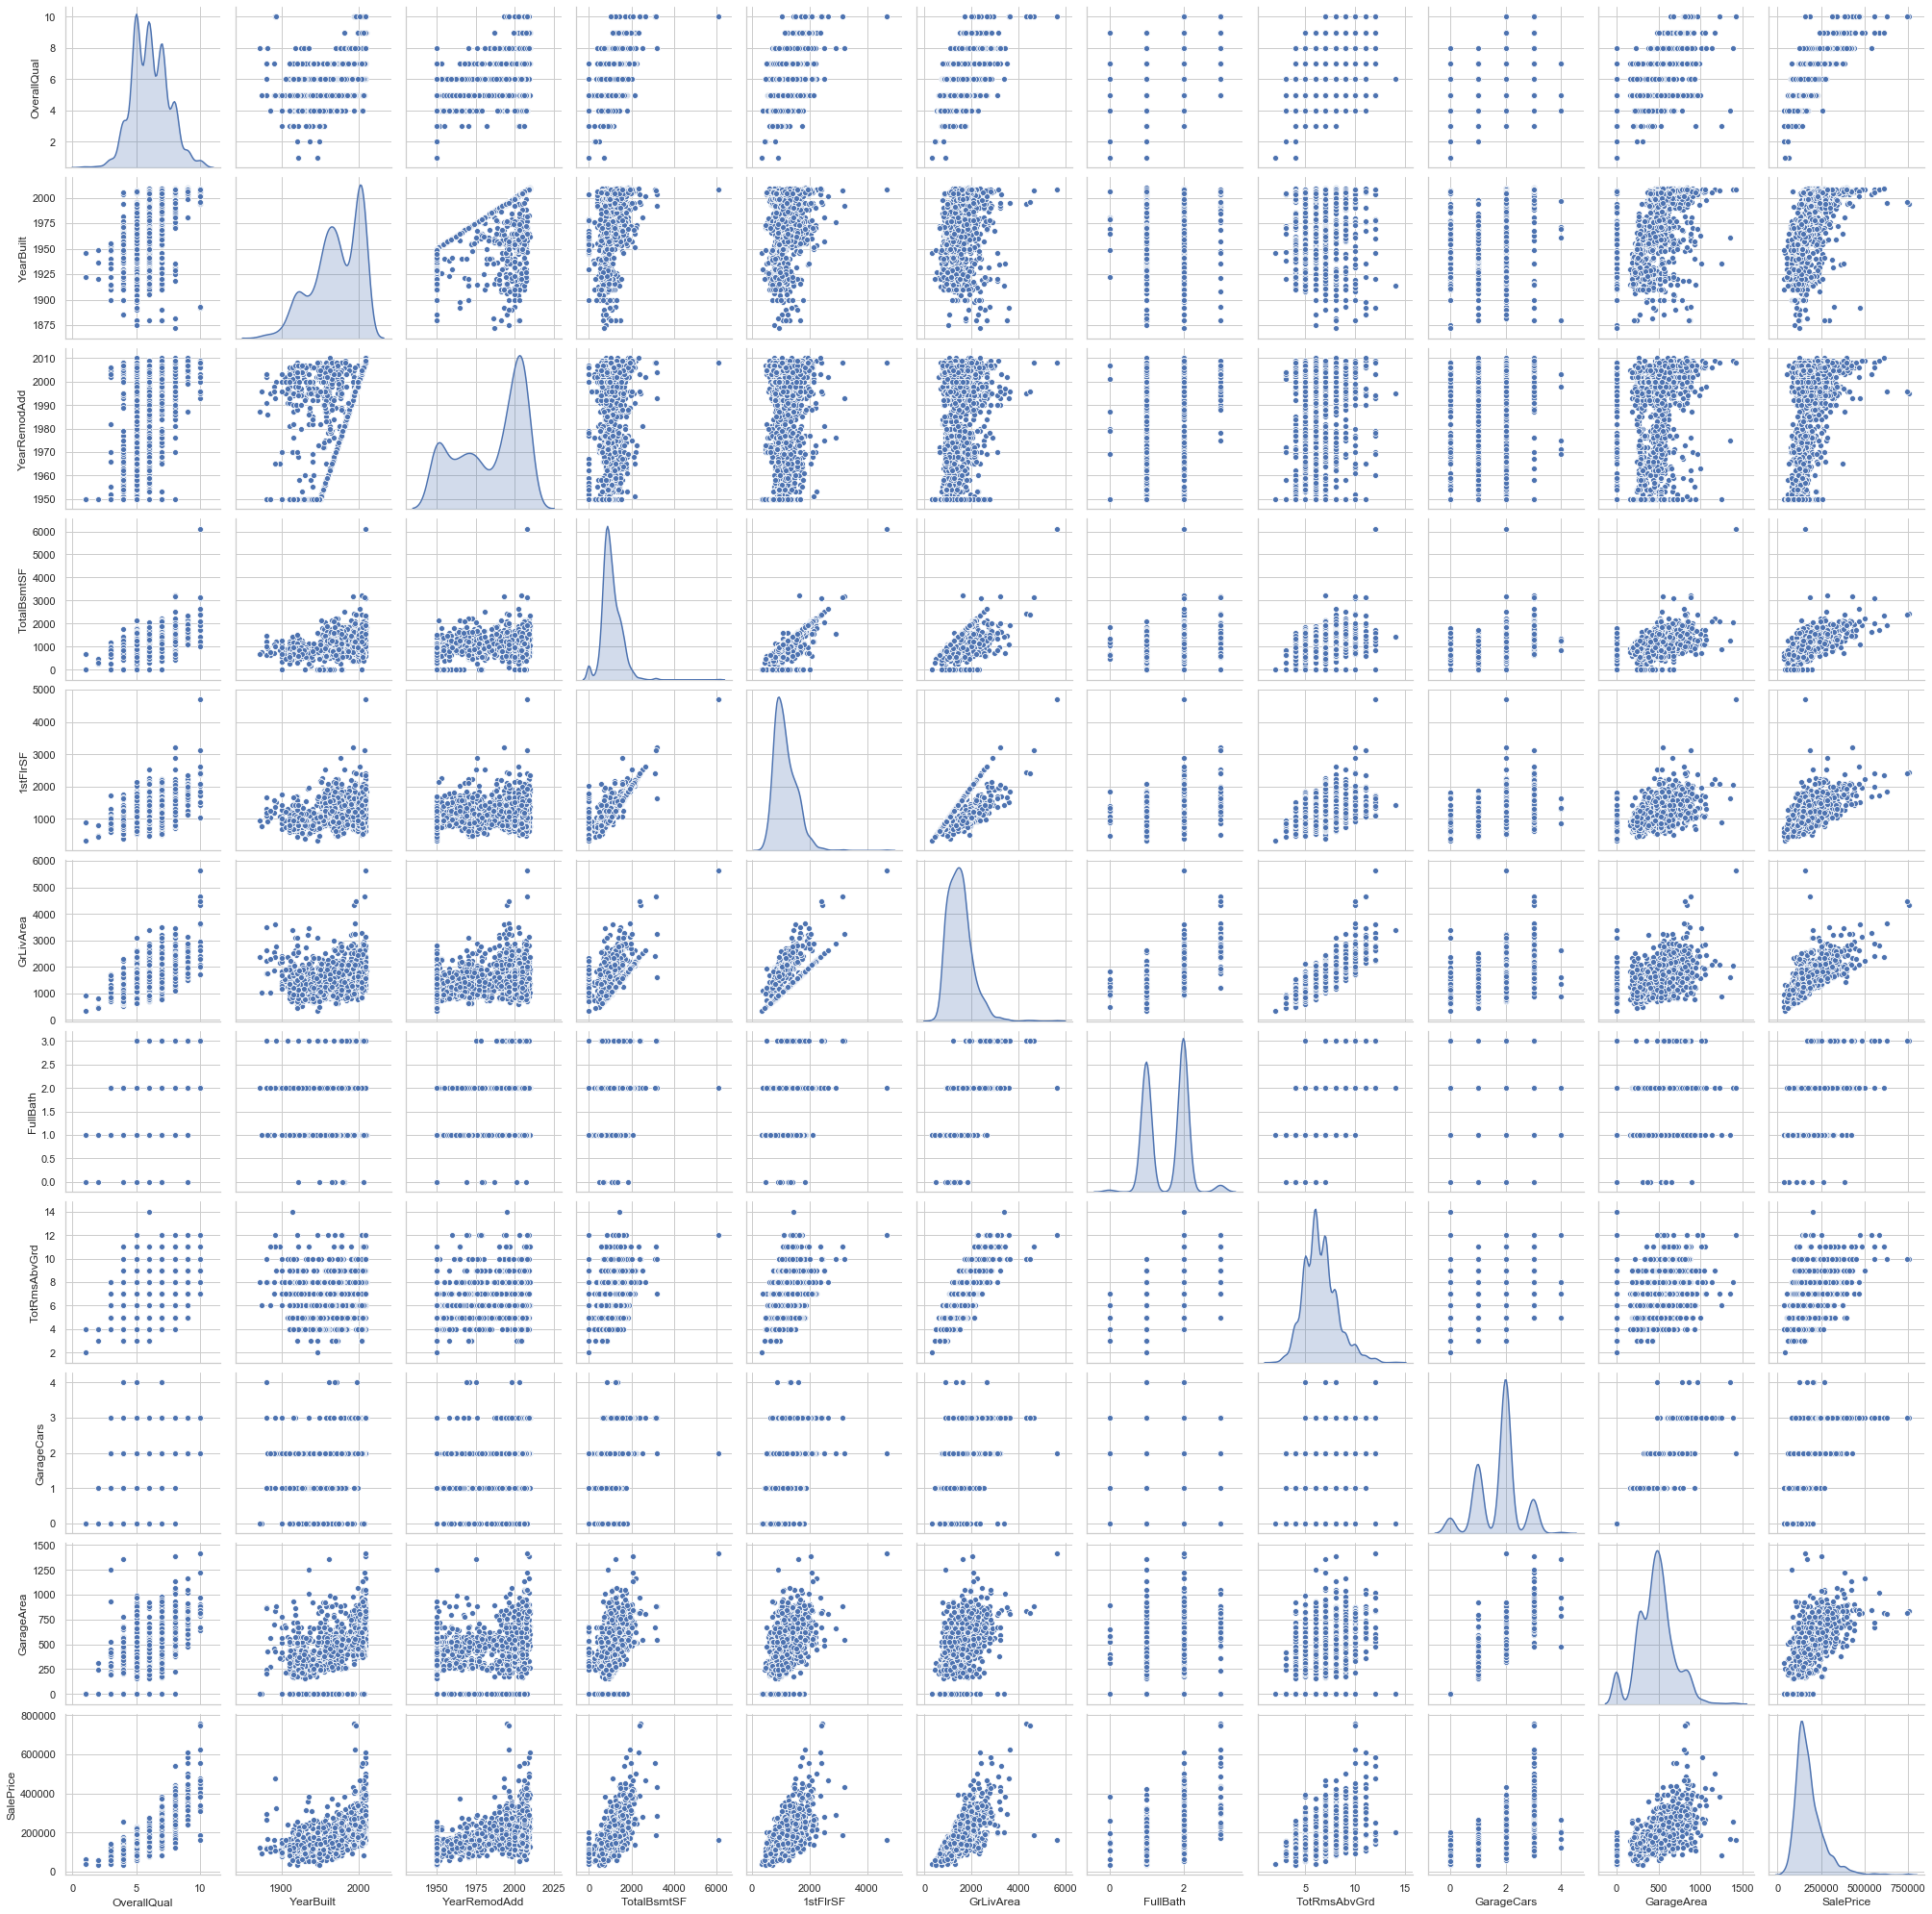

In [118]:
high_corr = corr_table[corr_table['SalePrice_abs'] > 0.5].index
# high_corr

sns.pairplot(train[high_corr], diag_kind = 'kde')

In [119]:
high_corr #개별로 그리기

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<b> 이 동네 비싼 집들의 몇 가지 특징 </b> <br>

1) OverallQual 점수 
- OverallQual 점수가 올라갈수록 당연히 주택 가격도 같이 오름

2) 주택의 면적 
- 지상 전체 주거 면적, 1층 면적, 지하실 면적 (+방 개수), 차고 면적(+차고에 수용가능한 자둥차 수), 화장실 수가 많을수록 주택 가격이 비싸지는 경향이 있다.

3) 신축
- 최근에 지어졌거나 최근에 리모델링한 경우 더 비싼 경향이 있다.

In [120]:
corr_table.loc[corr_table['SalePrice_abs'] <= 0.4,['SalePrice','SalePrice_abs']].sort_values(by='SalePrice_abs', ascending = False)

SalePrice  SalePrice_abs
BsmtFinSF1      0.386420       0.386420
LotFrontage     0.351799       0.351799
WoodDeckSF      0.324413       0.324413
2ndFlrSF        0.319334       0.319334
OpenPorchSF     0.315856       0.315856
HalfBath        0.284108       0.284108
LotArea         0.263843       0.263843
BsmtFullBath    0.227122       0.227122
BsmtUnfSF       0.214479       0.214479
BedroomAbvGr    0.168213       0.168213
KitchenAbvGr   -0.135907       0.135907
EnclosedPorch  -0.128578       0.128578
ScreenPorch     0.111447       0.111447
PoolArea        0.092404       0.092404
MSSubClass     -0.084284       0.084284
OverallCond    -0.077856       0.077856
MoSold          0.046432       0.046432
3SsnPorch       0.044584       0.044584
YrSold         -0.028923       0.028923
LowQualFinSF   -0.025606       0.025606
Id             -0.021917       0.021917
MiscVal        -0.021190       0.021190
BsmtHalfBath   -0.016844       0.016844
BsmtFinSF2     -0.011378       0.011378

##### 예상외로 위의 변수들은 상관이 낮았던 변수들

- 2층 면적
- 침실 수, 부엌 수, 수영장 면적

##### 다중공선성이 예상되는 변수 

- <b> TotalBsmtSF</b>: Total square feet of basement area    vs.  <b>1stFlrSF</b>: First Floor square feet
- <b>TotRmsAbvGrd</b>: Total rooms above grade (does not include bathrooms) vs. <b>GrLivArea</b>: Above grade (ground) living area square feet
- <b>GarageYrBlt</b>: Year garage was built vs. <b>YearBuilt</b>: Original construction date
- <b>GarageCars</b>: Size of garage in car capacity vs. <b>GarageArea</b>: Size of garage in square feet

 

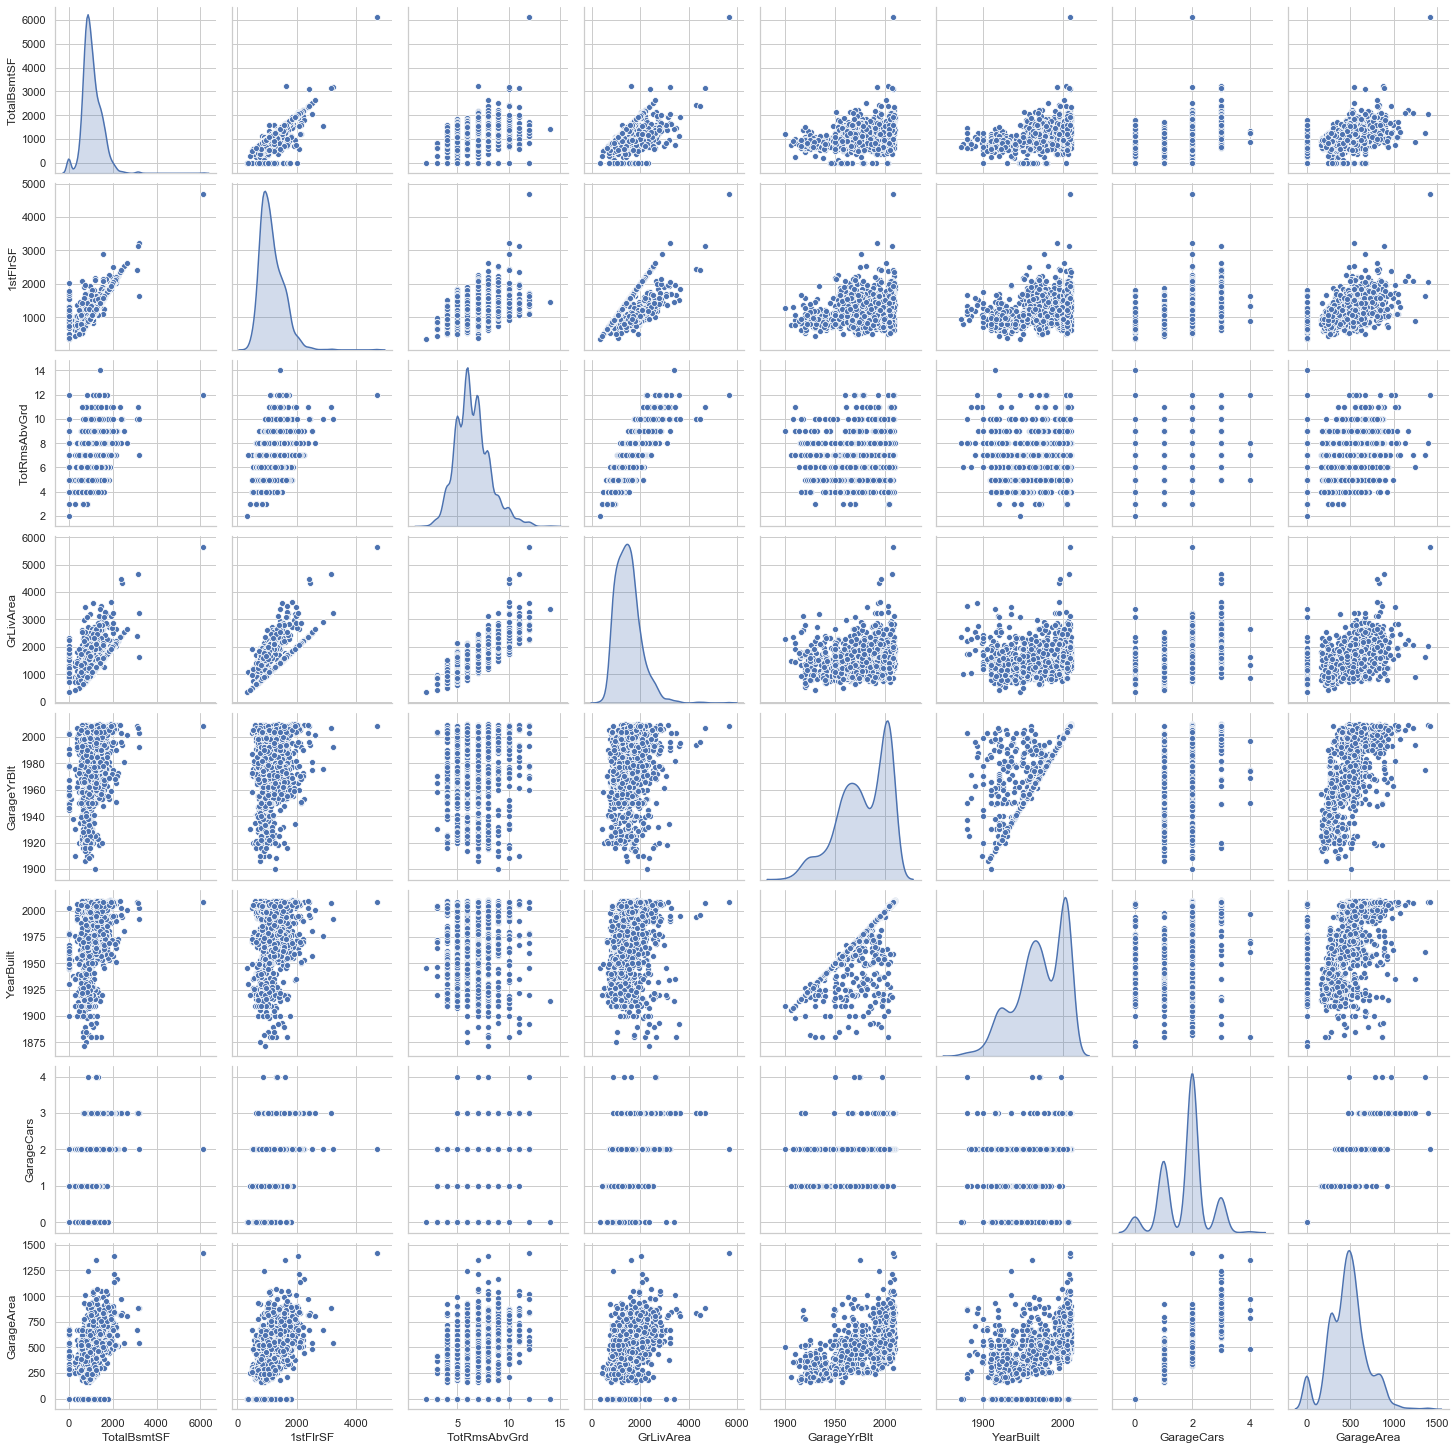

In [121]:
multi_col = ["TotalBsmtSF","1stFlrSF","TotRmsAbvGrd","GrLivArea","GarageYrBlt","YearBuilt","GarageCars","GarageArea"]
sns.pairplot(train[multi_col], diag_kind = 'kde')

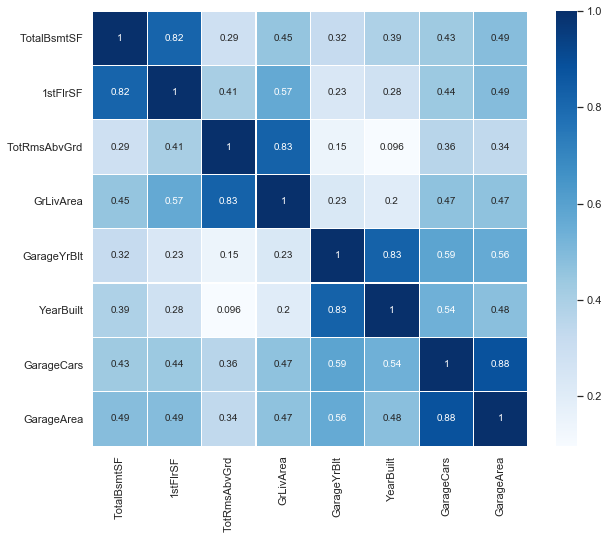

In [122]:
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(train[multi_col].corr(), annot=True, square = True,linewidths = 0.1, cmap = 'Blues', linecolor = "white")

### 2) Categorical Data

In [123]:
print(list(categorical.index))
print("범주형 변수: ",len(categorical.index), "개..")
train[categorical.index].head()

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
범주형 변수:  43 개..


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [124]:
for i in list(train[categorical.index]):
    print('*'*50)
    print(train[i].value_counts())

**************************************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
**************************************************
Grvl    50
Pave    41
Name: Alley, dtype: int64
**************************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**************************************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype:

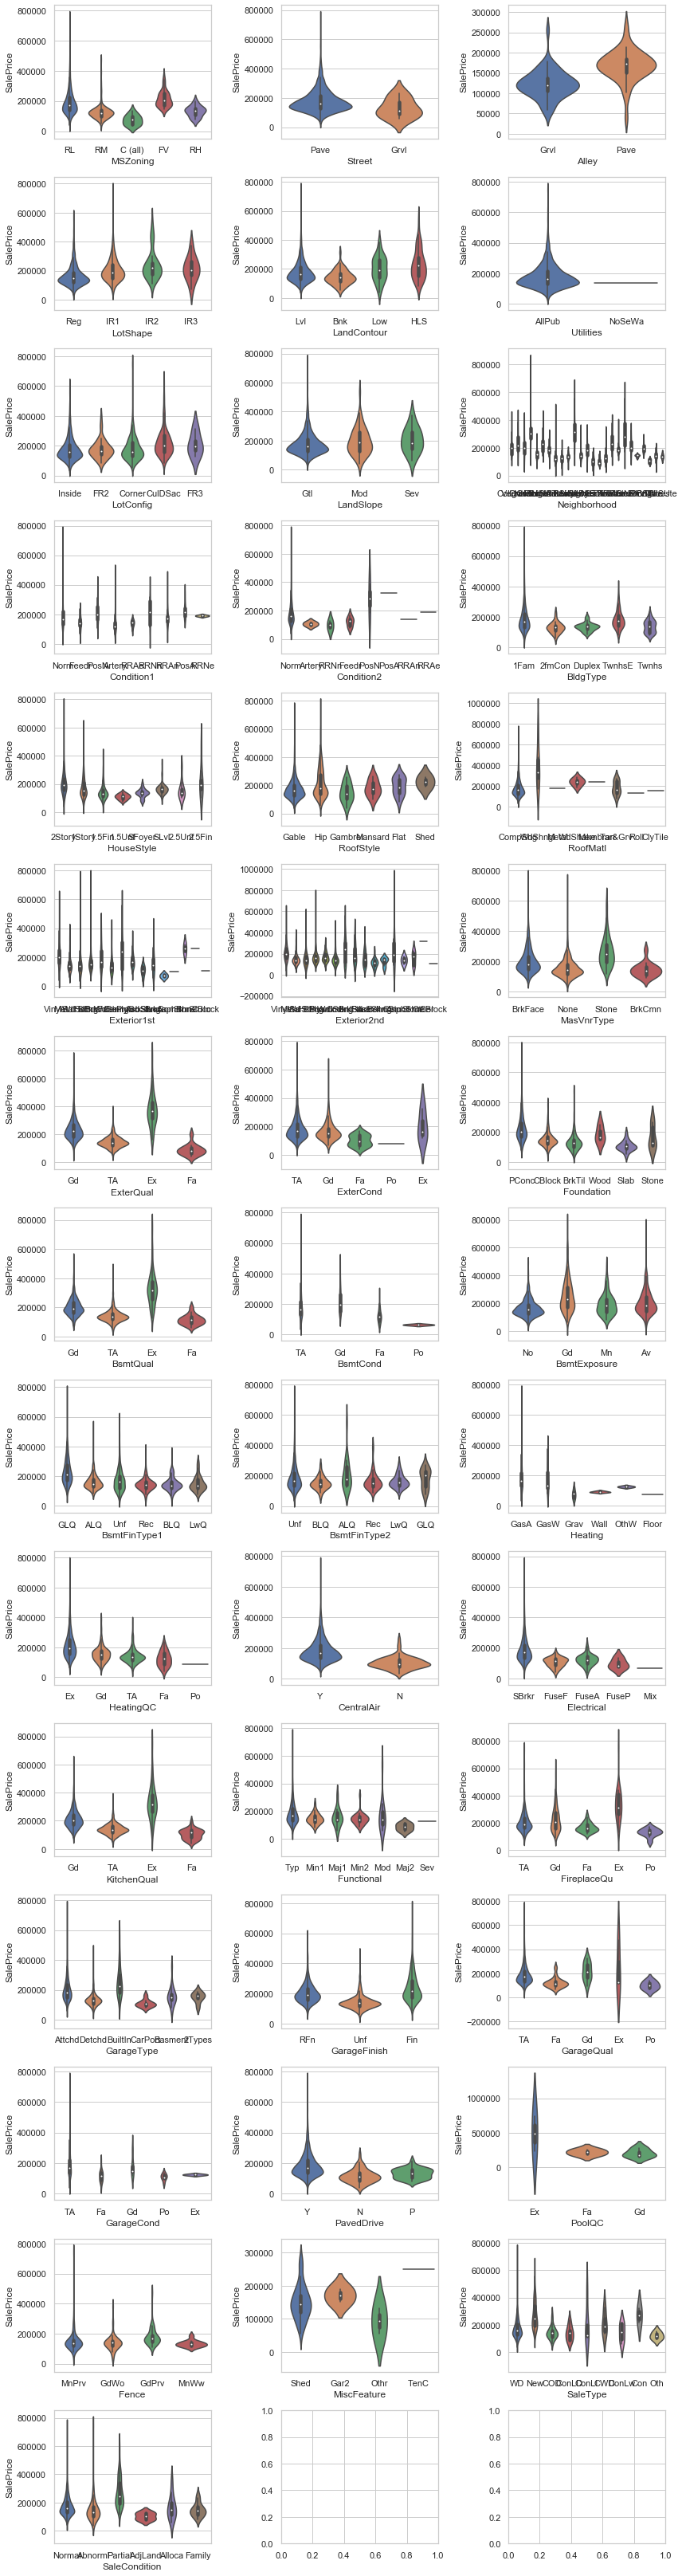

In [125]:
cat_feat_list = list(categorical.index)
nr_rows = 15 
nr_cols = 3 

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3)) 

for r in range(0, nr_rows): 
    for c in range(0, nr_cols): 
        i = r*nr_cols+c 
        if i < len(cat_feat_list): 
            sns.violinplot(x=cat_feat_list[i], y=train["SalePrice"], data=train, ax=axs[r][c])

plt.tight_layout() 
plt.show()

- Neighborhood : 동네에 따라서 주택 가격 편차가 매우 큼
- Condition1, Condition2 : 주택 관리 상태에 따라서도 엄청 편차가 크고,
- Street, Alley, PavedDrive : 진입로나 근처 골목/대로가 포장도로일 때 집값이 올라가는 경향

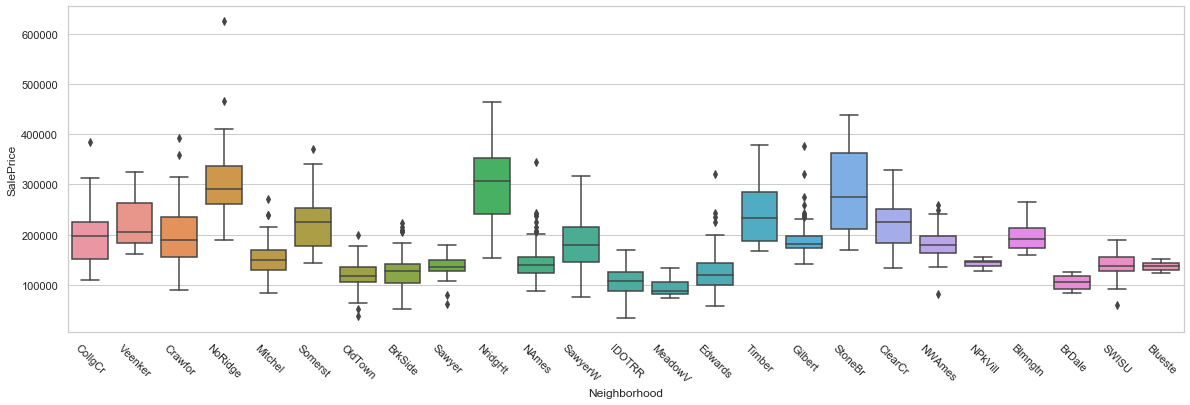

In [126]:
fig=plt.gcf()  
fig.set_size_inches(20,6)
plt.xticks(rotation = - 45 )
sns.boxplot(x='Neighborhood', y="SalePrice",data = train_new)

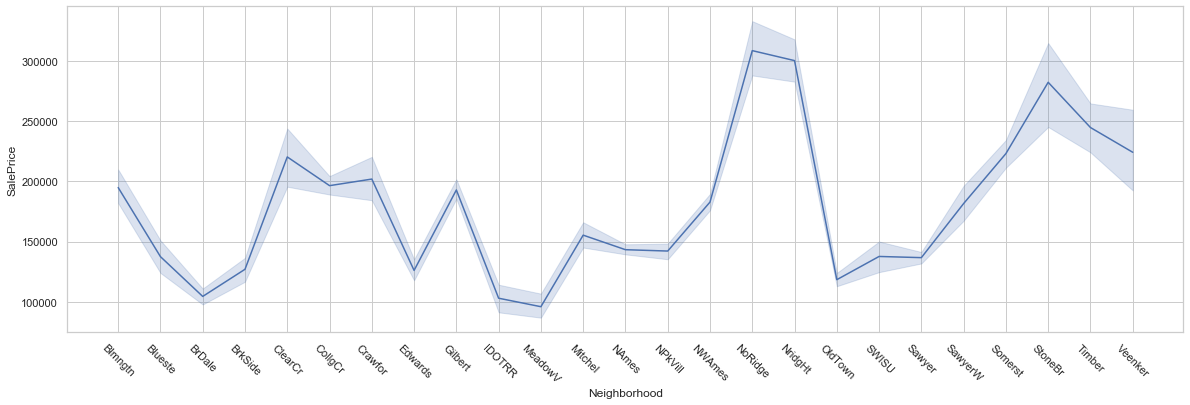

In [127]:
fig=plt.gcf()  
fig.set_size_inches(20,6)
plt.xticks(rotation = - 45 )
sns.lineplot(x = 'Neighborhood', y = 'SalePrice', data = train_new)

- SalePrice 분포에서 가장 큰 편차를 보인 변수는 Neighborhood
- 주택이 위치한 동네에 따라서 주택 가격이 크게 달라짐
- 가장 집값이 비싼 동네는 NridgHt, NoRidge, StoneBr였고, 가장 거래량이 많은 동네는 Names와 CollgCr이었음
- 집값이 비쌌던 StoneBr과 NridgHt의 연도별 가격 등락폭이 컸고, 이와 달리 NridgHt의 가격은 일관되게 높았음.

### 문제 정의

 어떤 주제를 가지고 진행 해야 하는지에 대한 분석과제 설계업무를 진행 <br>
 통상 분석 과제 설계의 경우 산업별 / 직무별로 첫번째 과제 단계에서 진행하는 경우도 있으나 <br>
 본 과정에서는 데이터를 보다 깊게 확인하고 해당 데이터를 통해 어떤 인사이트를 얻을 수 있는지에 대한 내용을 정리하는 관점에서 진행<br>

#### 연도 + 월 별 집값의 등락

In [128]:
import datetime

In [129]:
train_new['DateSold'] = train_new["YrSold"].astype('str') +'-'+ train_new["MoSold"].astype('str') +'-01'
train_new['DateSold'] = pd.to_datetime(train_new['DateSold'], format = '%Y-%m-%d')
train_new['DateSold']

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1333   2007-08-01
1334   2010-02-01
1335   2010-05-01
1336   2010-04-01
1337   2008-06-01
Name: DateSold, Length: 1338, dtype: datetime64[ns]

In [130]:
train2 = train_new
train2 = train_new.set_index('DateSold')
train2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
DateSold                                                                   
2008-02-01     1          60       RL         65.0     8450   Pave  None   
2007-05-01     2          20       RL         80.0     9600   Pave  None   
2008-09-01     3          60       RL         68.0    11250   Pave  None   
2006-02-01     4          70       RL         60.0     9550   Pave  None   
2008-12-01     5          60       RL         84.0    14260   Pave  None   
...          ...         ...      ...          ...      ...    ...   ...   
2007-08-01  1456          60       RL         62.0     7917   Pave  None   
2010-02-01  1457          20       RL         85.0    13175   Pave  None   
2010-05-01  1458          70       RL         66.0     9042   Pave  None   
2010-04-01  1459          20       RL         68.0     9717   Pave  None   
2008-06-01  1460          20       RL         75.0     9937   Pave  None   

           LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
DateSold                                                                     
2008-02-01      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
2007-05-01      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2008-09-01      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
2006-02-01      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
2008-12-01      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...             ...         ...       ...       ...       ...          ...   
2007-08-01      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
2010-02-01      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
2010-05-01      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
2010-04-01      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
2008-06-01      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

           Condition1 Condition2 BldgType HouseStyle  OverallQual  \
DateSold                                                            
2008-02-01       Norm       Norm     1Fam     2Story            7   
2007-05-01      Feedr       Norm     1Fam     1Story            6   
2008-09-01       Norm       Norm     1Fam     2Story            7   
2006-02-01       Norm       Norm     1Fam     2Story            7   
2008-12-01       Norm       Norm     1Fam     2Story            8   
...               ...        ...      ...        ...          ...   
2007-08-01       Norm       Norm     1Fam     2Story            6   
2010-02-01       Norm       Norm     1Fam     1Story            6   
2010-05-01       Norm       Norm     1Fam     2Story            7   
2010-04-01       Norm       Norm     1Fam     1Story            5   
2008-06-01       Norm       Norm     1Fam     1Story            5   

            OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
DateSold                                                              
2008-02-01            5       2003          2003     Gable  CompShg   
2007-05-01            8       1976          1976     Gable  CompShg   
2008-09-01            5       2001          2002     Gable  CompShg   
2006-02-01            5       1915          1970     Gable  CompShg   
2008-12-01            5       2000          2000     Gable  CompShg   
...                 ...        ...           ...       ...      ...   
2007-08-01            5       1999          2000     Gable  CompShg   
2010-02-01            6       1978          1988     Gable  CompShg   
2010-05-01            9       1941          2006     Gable  CompShg   
2010-04-01            6       1950          1996       Hip  CompShg   
2008-06-01            6       1965          1965     Gable  CompShg   

           Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
DateSold                                                                        
2008-02-01     VinylSd    

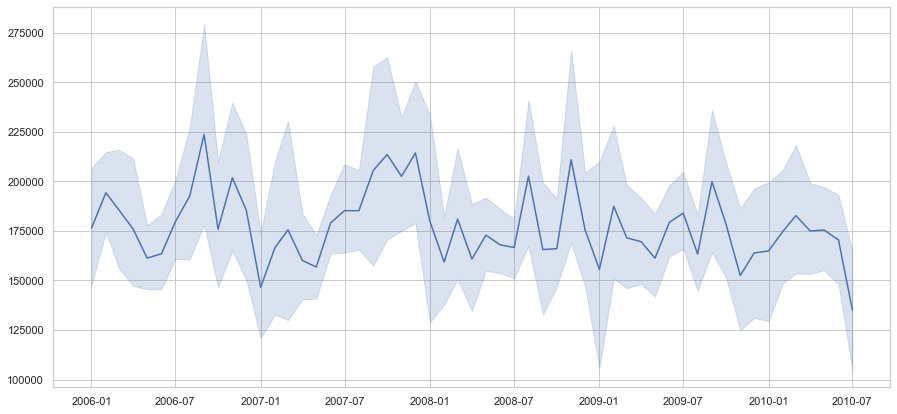

In [131]:
#연도 + 월별 집값
fig=plt.gcf()  
fig.set_size_inches(15,7)
sns.lineplot(data = train2['SalePrice'], palette = 'tab10')

- 연도별 집값을 평균치로만 보면 2007년 최고점($186,063)을 찍고 감소하는 추이<br>
- 조금 더 쪼개서 보면, 2006년 하반기, 2007년 하반기에 최고점을 찍음 <br>
- 뚜렷한 계절/월별 변동은 없음

- 1주차에 지역별로 집값의 편차가 큼을 발견했기 때문에, 시간에 따른 집값의 변동을 지역별로 나누어서 살펴봄
- 지역별 집 값 평균치를 표준편차를 기준으로 4가지 그룹으로 나눔

In [132]:
#지역별 집 값 평균치
salePrice_by_neighbor = pd.pivot_table(values = 'SalePrice', index = 'Neighborhood', data = train_new, aggfunc = 'mean').sort_values(by='SalePrice', ascending = False)
salePrice_by_neighbor 

SalePrice
Neighborhood               
NoRidge       308516.432432
NridgHt       300235.211268
StoneBr       282240.809524
Timber        244695.406250
Veenker       224150.000000
Somerst       223054.894118
ClearCr       220280.631579
Crawfor       201903.113636
CollgCr       196442.926174
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        182808.409091
SawyerW       181591.462963
Mitchel       155352.956522
NAmes         143281.673171
NPkVill       142156.250000
SWISU         137669.200000
Blueste       137500.000000
Sawyer        136686.647059
BrkSide       127019.196429
Edwards       126084.239130
OldTown       118390.645161
BrDale        104493.750000
IDOTRR        103002.424242
MeadowV        95960.000000

In [133]:
salePrice_by_neighbor.describe()

SalePrice
count      25.000000
mean   179249.666697
std     60976.143144
min     95960.000000
25%    136686.647059
50%    181591.462963
75%    220280.631579
max    308516.432432

In [134]:
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] < 150000,'group'] = 'under_150,000'
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] >= 150000,'group'] = 'over_150,000'
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] >= 200000,'group'] = 'over_200,000'

salePrice_by_neighbor

SalePrice          group
Neighborhood                              
NoRidge       308516.432432   over_200,000
NridgHt       300235.211268   over_200,000
StoneBr       282240.809524   over_200,000
Timber        244695.406250   over_200,000
Veenker       224150.000000   over_200,000
Somerst       223054.894118   over_200,000
ClearCr       220280.631579   over_200,000
Crawfor       201903.113636   over_200,000
CollgCr       196442.926174   over_150,000
Blmngtn       194870.882353   over_150,000
Gilbert       192854.506329   over_150,000
NWAmes        182808.409091   over_150,000
SawyerW       181591.462963   over_150,000
Mitchel       155352.956522   over_150,000
NAmes         143281.673171  under_150,000
NPkVill       142156.250000  under_150,000
SWISU         137669.200000  under_150,000
Blueste       137500.000000  under_150,000
Sawyer        136686.647059  under_150,000
BrkSide       127019.196429  under_150,000
Edwards       126084.239130  under_150,000
OldTown       118390.645161  under_150,000
BrDale        104493.750000  under_150,000
IDOTRR        103002.424242  under_150,000
MeadowV        95960.000000  under_150,000

In [135]:
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] < 136793.135135,'group_2'] = '1Q'
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] >= 136793.135135,'group_2'] = '1Q-2Q'
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] >= 186555.796610,'group_2'] = '2Q-3Q'
salePrice_by_neighbor.loc[salePrice_by_neighbor['SalePrice'] >= 212565.428571,'group_2'] = '3Q'

salePrice_by_neighbor

SalePrice          group group_2
Neighborhood                                      
NoRidge       308516.432432   over_200,000      3Q
NridgHt       300235.211268   over_200,000      3Q
StoneBr       282240.809524   over_200,000      3Q
Timber        244695.406250   over_200,000      3Q
Veenker       224150.000000   over_200,000      3Q
Somerst       223054.894118   over_200,000      3Q
ClearCr       220280.631579   over_200,000      3Q
Crawfor       201903.113636   over_200,000   2Q-3Q
CollgCr       196442.926174   over_150,000   2Q-3Q
Blmngtn       194870.882353   over_150,000   2Q-3Q
Gilbert       192854.506329   over_150,000   2Q-3Q
NWAmes        182808.409091   over_150,000   1Q-2Q
SawyerW       181591.462963   over_150,000   1Q-2Q
Mitchel       155352.956522   over_150,000   1Q-2Q
NAmes         143281.673171  under_150,000   1Q-2Q
NPkVill       142156.250000  under_150,000   1Q-2Q
SWISU         137669.200000  under_150,000   1Q-2Q
Blueste       137500.000000  under_150,000   1Q-2Q
Sawyer        136686.647059  under_150,000      1Q
BrkSide       127019.196429  under_150,000      1Q
Edwards       126084.239130  under_150,000      1Q
OldTown       118390.645161  under_150,000      1Q
BrDale        104493.750000  under_150,000      1Q
IDOTRR        103002.424242  under_150,000      1Q
MeadowV        95960.000000  under_150,000      1Q

In [136]:
under_150000 = salePrice_by_neighbor[salePrice_by_neighbor['group']=='under_150,000'].index
over_150000 = salePrice_by_neighbor[salePrice_by_neighbor['group']=='over_150,000'].index
over_200000 = salePrice_by_neighbor[salePrice_by_neighbor['group']=='over_200,000'].index

In [137]:
under_1Q = salePrice_by_neighbor[salePrice_by_neighbor['group_2']=='1Q'].index
between_1Q_2Q = salePrice_by_neighbor[salePrice_by_neighbor['group_2']=='1Q-2Q'].index
between_2Q_3Q = salePrice_by_neighbor[salePrice_by_neighbor['group_2']=='2Q-3Q'].index
over_3Q = salePrice_by_neighbor[salePrice_by_neighbor['group_2']=='3Q'].index

In [138]:
train_new.loc[train_new['Neighborhood'].isin(under_150000),'price_group'] = '150000_under'
train_new.loc[train_new['Neighborhood'].isin(over_150000),'price_group'] = '150000_over'
train_new.loc[train_new['Neighborhood'].isin(over_200000),'price_group'] = '200000_over'
train_new.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [139]:
train_new.loc[train_new['Neighborhood'].isin(under_1Q),'price_group_2'] = 'under_1Q'
train_new.loc[train_new['Neighborhood'].isin(between_1Q_2Q),'price_group_2'] = 'between_1Q_2Q'
train_new.loc[train_new['Neighborhood'].isin(between_2Q_3Q),'price_group_2'] = 'between_2Q_3Q'
train_new.loc[train_new['Neighborhood'].isin(over_3Q),'price_group_2'] = 'over_3Q'
train_new.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

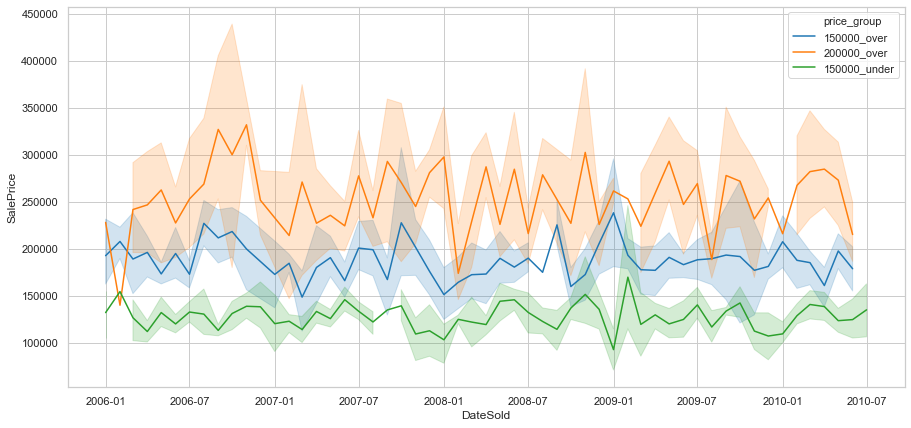

In [140]:
#연도 + 월별 집값 + 지역 - group1
fig = plt.gcf()
fig.set_size_inches(15, 7)
sns.lineplot(x="DateSold",
             y="SalePrice",
             hue = 'price_group',
             data=train_new,
             palette='tab10')

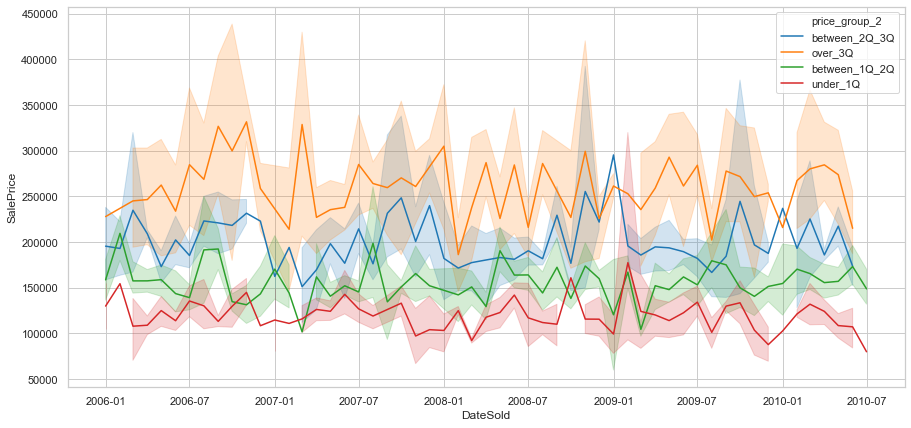

In [141]:
#연도 + 월별 집값 + 지역 - group2
fig = plt.gcf()
fig.set_size_inches(15, 7)
sns.lineplot(x="DateSold",
             y="SalePrice",
             hue = 'price_group_2',
             data=train_new,
             palette='tab10')

그 결과 지역 그룹 별로 집값 변동의 추이가 다르게 나타남,<br>
i)  가격이 상대적으로 비싼(2Q이상) 지역의 가격 변동은 크지만, 가격이 낮은 그룹 (under_1Q)의 가격은 변동폭이 더 작음 <br>
ii)  2006년 하반기와 2007년 하반기 가격 상승에 가격이 높은 그룹 over_3Q와 between_2Q_3Q의 가격 상승이 영향을 미친 것으로 보임.

In [142]:
pd.pivot_table(data = train_new, index = 'YrSold', columns = 'price_group_2', values = 'SalePrice', aggfunc = 'mean')

price_group_2  between_1Q_2Q  between_2Q_3Q        over_3Q       under_1Q
YrSold                                                                   
2006           151896.282051  200772.108108  268823.500000  123503.375000
2007           153334.629630  196692.089552  260890.472222  124193.700000
2008           158418.827586  192128.611111  256117.596491  123201.345679
2009           156798.752577  191430.458333  263947.111111  120849.211765
2010           160275.431034  204936.363636  254349.764706  116190.829787

2009년에 거래를 했다는 가정으로 중간가격의 주택을 구매한 사람들이 더 이득을 보았을 가능성이 높다(beween_1Q_2Q, between_2Q_3Q)

In [143]:
#가격 상승 폭이 특정 지역의 집값 상승과 관련이있나? 아니면 특정 지역의 집 거래량과 상관이 있나?(비싼 동네의 거래량이 늘었나?)
SalesVolume_by_PriceGroup = pd.pivot_table(data=train_new,
               index='DateSold',
               columns='price_group_2',
               values='SalePrice',
               aggfunc='count')
SalesVolume_by_PriceGroup

price_group_2  between_1Q_2Q  between_2Q_3Q  over_3Q  under_1Q
DateSold                                                      
2006-01-01               2.0            4.0      1.0       2.0
2006-02-01               3.0            5.0      NaN       1.0
2006-03-01               9.0            3.0      7.0       4.0
2006-04-01               2.0            2.0     10.0      11.0
2006-05-01              15.0            8.0      3.0      10.0
2006-06-01              12.0           10.0      7.0      13.0
2006-07-01              17.0           21.0     10.0      11.0
2006-08-01               2.0            6.0      5.0       9.0
2006-09-01               2.0            4.0      5.0       4.0
2006-10-01               4.0            6.0      3.0      10.0
2006-11-01               4.0            4.0      3.0       4.0
2006-12-01               6.0            1.0      4.0       1.0
2007-01-01               4.0            2.0      NaN       4.0
2007-02-01               3.0            1.0      2.0       1.0
2007-03-01               1.0            5.0      4.0       7.0
2007-04-01               9.0            2.0      3.0       7.0
2007-05-01               7.0            7.0      6.0      20.0
2007-06-01              22.0            7.0     17.0      11.0
2007-07-01              17.0           11.0     10.0      11.0
2007-08-01               4.0           13.0     10.0      11.0
2007-09-01               3.0            4.0      2.0       NaN
2007-10-01               2.0            4.0      4.0       3.0
2007-11-01               5.0            7.0      7.0       2.0
2007-12-01               4.0            4.0      7.0       3.0
2008-01-01               NaN            4.0      3.0       5.0
2008-02-01               2.0            4.0      2.0       2.0
2008-03-01               5.0            4.0      6.0       2.0
2008-04-01               9.0            4.0      4.0       7.0
2008-05-01               9.0            7.0      6.0      11.0
2008-06-01              16.0            6.0      5.0      23.0
2008-07-01              16.0           10.0      7.0      11.0
2008-08-01               4.0            2.0     12.0       8.0
2008-09-01               2.0            5.0      NaN       6.0
2008-10-01              12.0            3.0      5.0       1.0
2008-11-01               8.0            3.0      4.0       2.0
2008-12-01               4.0            2.0      3.0       3.0
2009-01-01               2.0            1.0      2.0       5.0
2009-02-01               3.0            3.0      1.0       3.0
2009-03-01               2.0            8.0      4.0       5.0
2009-04-01              10.0            6.0      3.0       5.0
2009-05-01               7.0           11.0      3.0      14.0
2009-06-01              19.0           15.0      7.0       7.0
2009-07-01              16.0            8.0     14.0      18.0
2009-08-01              12.0            6.0      4.0       6.0
2009-09-01               7.0            5.0      5.0       2.0
2009-10-01               9.0            3.0      5.0       9.0
2009-11-01               7.0            3.0      3.0       7.0
2009-12-01               3.0            3.0      3.0       4.0
2010-01-01               6.0            1.0      1.0       1.0
2010-02-01               6.0            3.0      2.0       4.0
2010-03-01               7.0            2.0      4.0       7.0
2010-04-01              15.0            2.0      8.0      12.0
2010-05-01              13.0           10.0      7.0      13.0
2010-06-01               7.0            4.0     12.0       9.0
2010-07-01               4.0            NaN      NaN       1.0

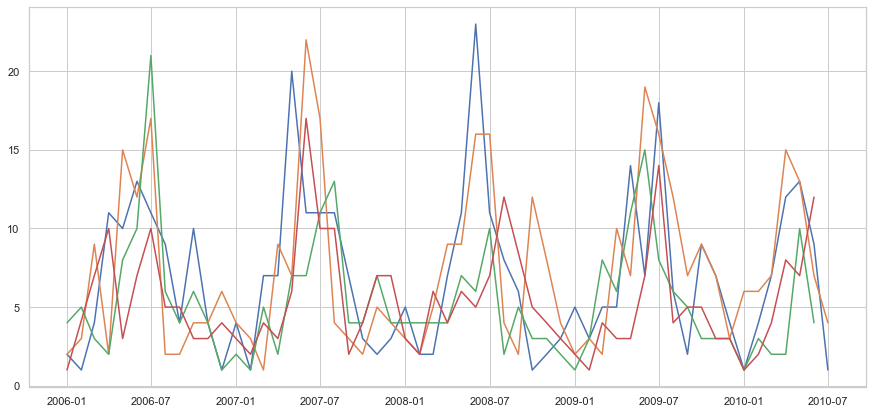

In [144]:
fig = plt.gcf()
fig.set_size_inches(15, 7)
#연도/월별 거래량
sns.lineplot(data = SalesVolume_by_PriceGroup['under_1Q'], palette = 'tab10')
sns.lineplot(data = SalesVolume_by_PriceGroup['between_1Q_2Q'], palette = 'tab10') 
sns.lineplot(data = SalesVolume_by_PriceGroup['between_2Q_3Q'], palette = 'tab10') 
sns.lineplot(data = SalesVolume_by_PriceGroup['over_3Q'], palette = 'tab10')

#가격 그룹에 상관없이 거래량은 매년 7월 즈음 높음 - 기각

In [145]:
# train_new_150000_under = train_new[train_new['price_group'] == '150000_under']
# train_new_150000_over = train_new[train_new['price_group'] == '150000_over']
# train_new_200000_over = train_new[train_new['price_group'] == '200000_over']

# train_new_150000_under

train_new_under_1Q = train_new[train_new['price_group_2'] == 'under_1Q']
train_new_between_1Q_2Q = train_new[train_new['price_group_2'] == 'between_1Q_2Q']
train_new_between_2Q_3Q = train_new[train_new['price_group_2'] == 'between_2Q_3Q']
train_new_over_3Q = train_new[train_new['price_group_2'] == 'over_3Q']


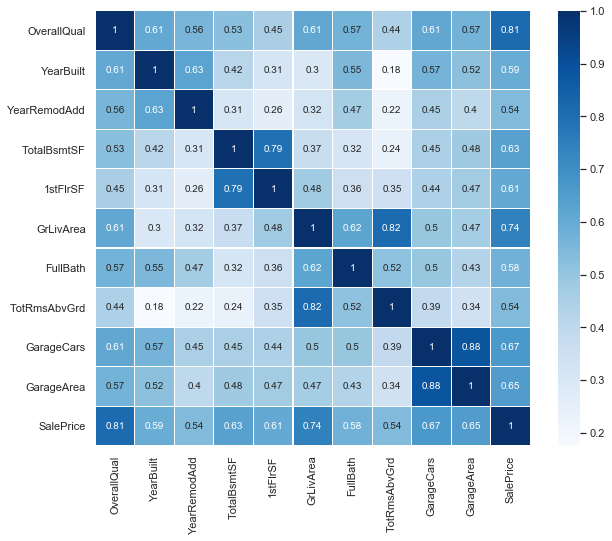

In [146]:
#지역별로 집값에 영향을 미치는 변수가 다른가?
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(train_new[high_corr].corr(), annot=True, square = True,linewidths = 0.1, cmap = 'Blues', linecolor = "white")

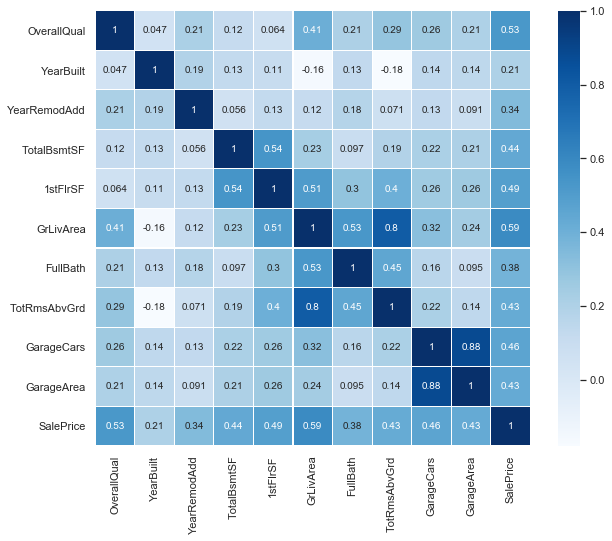

In [147]:
#제일 싼 그룹 - under_1Q
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_new_under_1Q[high_corr].corr(),
            annot=True,
            square=True,
            linewidths=0.1,
            cmap='Blues',
            linecolor="white")

In [148]:
pd.DataFrame(train_new_under_1Q.corr().abs()['SalePrice']).sort_values(by='SalePrice', ascending = False)

SalePrice
SalePrice       1.000000
GrLivArea       0.585674
OverallQual     0.528344
1stFlrSF        0.489466
GarageCars      0.463152
TotalBsmtSF     0.441578
GarageArea      0.430112
TotRmsAbvGrd    0.428648
BedroomAbvGr    0.416307
FullBath        0.384779
LotArea         0.383841
Fireplaces      0.366239
YearRemodAdd    0.343158
GarageYrBlt     0.332656
LotFrontage     0.328529
BsmtFinSF1      0.301419
OverallCond     0.275358
2ndFlrSF        0.249231
WoodDeckSF      0.241481
YearBuilt       0.207201
ScreenPorch     0.206119
HalfBath        0.189547
BsmtFullBath    0.178511
OpenPorchSF     0.120088
MasVnrArea      0.095449
3SsnPorch       0.079863
YrSold          0.062395
BsmtUnfSF       0.060478
BsmtHalfBath    0.059416
MSSubClass      0.058313
BsmtFinSF2      0.041449
MiscVal         0.040769
EnclosedPorch   0.036693
KitchenAbvGr    0.028530
Id              0.019325
LowQualFinSF    0.013314
MoSold          0.000688
PoolArea             NaN

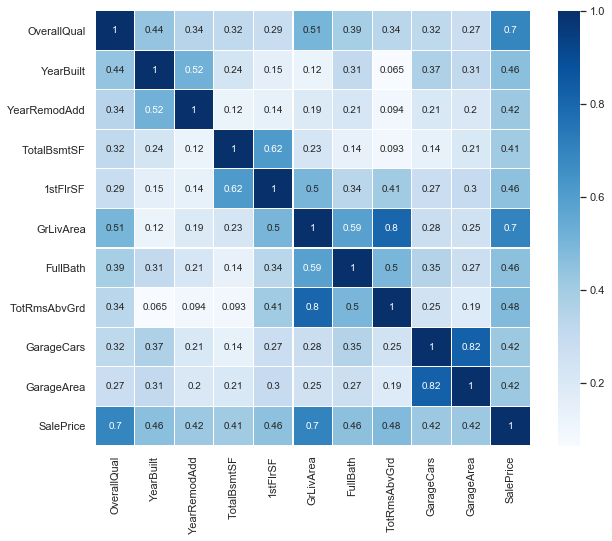

In [149]:
#train_new_between_1Q_2Q
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_new_between_1Q_2Q[high_corr].corr(),
            annot=True,
            square=True,
            linewidths=0.1,
            cmap='Blues',
            linecolor="white")

In [150]:
pd.DataFrame(train_new_between_1Q_2Q.corr().abs()['SalePrice']).sort_values(by='SalePrice', ascending = False)

SalePrice
SalePrice       1.000000
GrLivArea       0.703824
OverallQual     0.695230
TotRmsAbvGrd    0.483951
YearBuilt       0.462607
FullBath        0.458339
1stFlrSF        0.455568
Fireplaces      0.443176
2ndFlrSF        0.421623
YearRemodAdd    0.421574
GarageCars      0.420866
GarageArea      0.420283
TotalBsmtSF     0.411394
HalfBath        0.385950
BsmtFinSF1      0.377728
OpenPorchSF     0.338654
LotArea         0.307644
LotFrontage     0.256698
WoodDeckSF      0.249282
BsmtFullBath    0.237599
BedroomAbvGr    0.232389
MasVnrArea      0.227154
ScreenPorch     0.192871
GarageYrBlt     0.191664
KitchenAbvGr    0.156347
OverallCond     0.149670
BsmtFinSF2      0.087049
Id              0.076158
YrSold          0.068322
MSSubClass      0.067823
LowQualFinSF    0.064819
3SsnPorch       0.050385
BsmtHalfBath    0.042929
PoolArea        0.036850
EnclosedPorch   0.029048
MoSold          0.028798
BsmtUnfSF       0.022050
MiscVal         0.016934

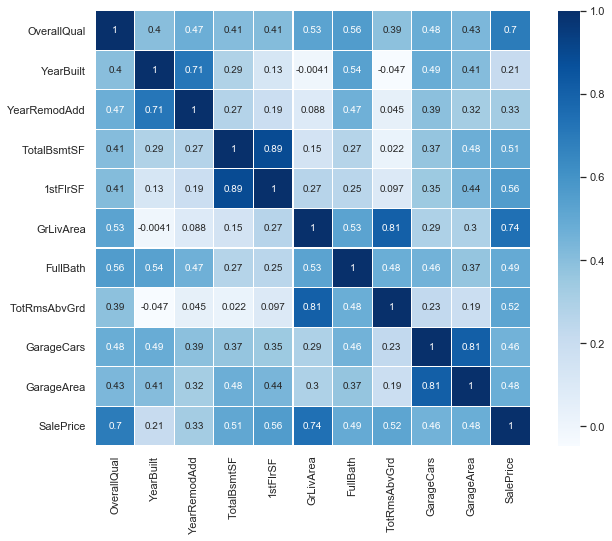

In [151]:
#train_new_between_2Q_3Q
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_new_between_2Q_3Q[high_corr].corr(),
            annot=True,
            square=True,
            linewidths=0.1,
            cmap='Blues',
            linecolor="white")

In [152]:
pd.DataFrame(train_new_between_2Q_3Q.corr().abs()['SalePrice']).sort_values(by='SalePrice', ascending = False)

SalePrice
SalePrice       1.000000
GrLivArea       0.740442
OverallQual     0.695941
1stFlrSF        0.562120
TotRmsAbvGrd    0.519789
TotalBsmtSF     0.509191
FullBath        0.494299
GarageArea      0.479045
GarageCars      0.457894
OpenPorchSF     0.399891
Fireplaces      0.359466
MasVnrArea      0.358365
YearRemodAdd    0.329219
BsmtFinSF1      0.289604
2ndFlrSF        0.257124
BedroomAbvGr    0.234670
YearBuilt       0.213037
LotArea         0.205220
BsmtFullBath    0.204211
MoSold          0.173191
ScreenPorch     0.153807
GarageYrBlt     0.148634
HalfBath        0.147981
WoodDeckSF      0.129808
BsmtUnfSF       0.121555
LotFrontage     0.120285
3SsnPorch       0.115396
MiscVal         0.106698
EnclosedPorch   0.099161
KitchenAbvGr    0.090934
OverallCond     0.078249
BsmtFinSF2      0.052392
MSSubClass      0.050898
YrSold          0.037834
LowQualFinSF    0.034101
BsmtHalfBath    0.019683
Id              0.014020
PoolArea             NaN

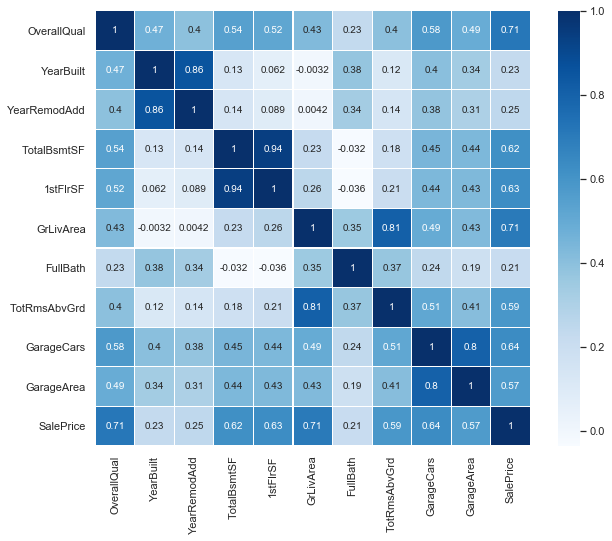

In [153]:
#제일 비싼 그룹 - train_new_over_3Q
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_new_over_3Q[high_corr].corr(),
            annot=True,
            square=True,
            linewidths=0.1,
            cmap='Blues',
            linecolor="white")

In [154]:
pd.DataFrame(train_new_over_3Q.corr().abs()['SalePrice']).sort_values(by='SalePrice', ascending = False)

SalePrice
SalePrice       1.000000
OverallQual     0.713818
GrLivArea       0.707095
GarageCars      0.635599
1stFlrSF        0.631360
TotalBsmtSF     0.618816
TotRmsAbvGrd    0.588411
GarageArea      0.570019
LotFrontage     0.490199
MasVnrArea      0.460459
Fireplaces      0.424134
BsmtFinSF1      0.417084
MSSubClass      0.414022
WoodDeckSF      0.389206
BsmtFullBath    0.299423
LotArea         0.270773
YearRemodAdd    0.245798
YearBuilt       0.228109
GarageYrBlt     0.217208
FullBath        0.211539
BedroomAbvGr    0.196341
LowQualFinSF    0.158259
2ndFlrSF        0.148822
OverallCond     0.135123
OpenPorchSF     0.112831
HalfBath        0.099328
BsmtHalfBath    0.096996
MoSold          0.079957
BsmtUnfSF       0.074589
MiscVal         0.049070
ScreenPorch     0.044623
YrSold          0.042654
3SsnPorch       0.035167
BsmtFinSF2      0.034153
Id              0.033178
EnclosedPorch   0.007868
KitchenAbvGr         NaN
PoolArea             NaN

- 가격 그룹별로 상관이 높게 나오는 변수들이 다름

#### OverallQual과 집값 변동간의 관계

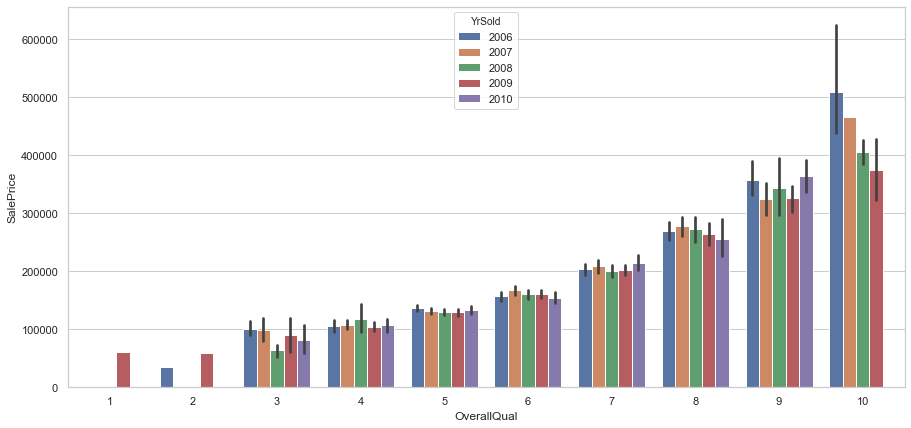

In [155]:
fig = plt.gcf()
fig.set_size_inches(15, 7)
sns.barplot(x='OverallQual',
             y="SalePrice",
             hue = 'YrSold',
             data=train_new)

추가로, 1주차 과제에서 Quality나 Condition 관련 변수가 가격에 영향을 주었기 때문에 몇 가지 더 살펴보았음
- 의외로, OverallQual이 제일 높았던 주택의 연도별 SalePrice낙폭이 가장 컸고, OverallQual이 10점인 주택을 산 사람이 가장 큰 손해를 보았을 가능성이 높았다.
- OverallQual이 중간정도(5~7)인 주택을 구매한 경우, 연도에 따라 거래 가격 편차가 적었고, 상대적으로 손해를 덜 보았을 가능성이 높다.

In [156]:
# pd.DataFrame(train_new['YearBuilt'].value_counts()).head(30)
bins = [1900,1930,1950,1970,2000,2005,2010]
train_new["YearBuilt_cut"] = pd.cut(train_new["YearBuilt"], bins, right=False, labels=bins[:-1])
train_new[['YearBuilt','YearBuilt_cut']]

YearBuilt YearBuilt_cut
0          2003          2000
1          1976          1970
2          2001          2000
3          1915          1900
4          2000          2000
...         ...           ...
1333       1999          1970
1334       1978          1970
1335       1941          1930
1336       1950          1950
1337       1965          1950

[1338 rows x 2 columns]

In [157]:
pd.DataFrame(train_new['YearRemodAdd'].value_counts()).head(30)
bins = [1950,1960,1980,1990,2000,2005,2010]
train_new["YearRemodAdd_cut"] = pd.cut(train_new["YearRemodAdd"], bins, right=False, labels=bins[:-1])
train_new[['YearRemodAdd','YearRemodAdd_cut']]

YearRemodAdd YearRemodAdd_cut
0             2003             2000
1             1976             1960
2             2002             2000
3             1970             1960
4             2000             2000
...            ...              ...
1333          2000             2000
1334          1988             1980
1335          2006             2005
1336          1996             1990
1337          1965             1960

[1338 rows x 2 columns]

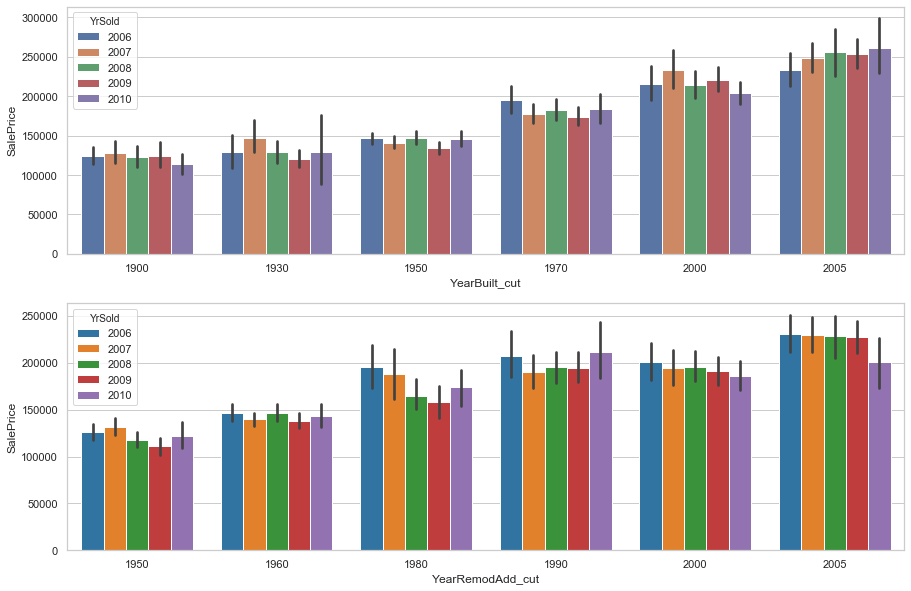

In [158]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10)) 
sns.barplot(x='YearBuilt_cut',
             y="SalePrice",
             hue = 'YrSold',
             data=train_new, ax = ax[0])

sns.barplot(x="YearRemodAdd_cut",
             y="SalePrice",
             hue = 'YrSold',
             data=train_new,
             palette='tab10', ax = ax[1])

In [159]:
#건축연도와 리모델링 연도가 연도별 SalePrice에 영향을 주는지 확인하기 위해 ANOVA 실행

import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Bring them in dataframe-format
df = pd.DataFrame(train_new, columns=['SalePrice', 'YearBuilt_cut', 'YrSold'])

formula = 'SalePrice ~ C(YearBuilt_cut) + C(YrSold) + C(YearBuilt_cut):C(YrSold)'
lm = ols(formula, df).fit()
print(anova_lm(lm))
print(lm.summary())

                                df        sum_sq       mean_sq           F  \
C(YearBuilt_cut)               5.0  2.352679e+12  4.705359e+11  148.385057   
C(YrSold)                      4.0  6.879847e+09  1.719962e+09    0.542396   
C(YearBuilt_cut):C(YrSold)    20.0  6.490690e+10  3.245345e+09    1.023430   
Residual                    1300.0  4.122360e+12  3.171046e+09         NaN   

                                   PR(>F)  
C(YearBuilt_cut)            9.473202e-125  
C(YrSold)                    7.046277e-01  
C(YearBuilt_cut):C(YrSold)   4.301540e-01  
Residual                              NaN  
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     26.36
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.96

In [160]:
df = pd.DataFrame(train_new, columns=['SalePrice', 'YearRemodAdd_cut', 'YrSold'])

formula = 'SalePrice ~ C(YearRemodAdd_cut) + C(YrSold) + C(YearRemodAdd_cut):C(YrSold)'
lm = ols(formula, df).fit()
print(anova_lm(lm))
print(lm.summary())

                                   df        sum_sq       mean_sq           F  \
C(YearRemodAdd_cut)               5.0  1.968545e+12  3.937089e+11  114.861554   
C(YrSold)                         4.0  2.111661e+10  5.279153e+09    1.540153   
C(YearRemodAdd_cut):C(YrSold)    20.0  5.008775e+10  2.504388e+09    0.730636   
Residual                       1303.0  4.466270e+12  3.427682e+09         NaN   

                                      PR(>F)  
C(YearRemodAdd_cut)            1.016446e-100  
C(YrSold)                       1.881656e-01  
C(YearRemodAdd_cut):C(YrSold)   7.970894e-01  
Residual                                 NaN  
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     20.52
Date:                Wed, 26 Aug 2020   Pro

- 2005년 이후에 지어진 신축 주택은 2006년부터 2010년까지, 2009년을 제외하고는 꾸준히 상승했다.
- 즉, 신축 주택을 사야 가격 상승과 이득을 기대할 수 있을 것으로 보인다.
- 이와 달리 리모델링한 연도는 무관한 것으로 보였다.(어떤 구간에서도 SalePrice * YearRemodAdd간의 상호작용효과도 p-value 0.05수준에서 유의하지 않음)

## Feature Engineering

- 유의하지 않은 변수 삭제
- Log 변환
- Categorical Data 수치형 변환
- 새로운 변수 생성

- 다중공선성 처리 및 유의하지 않은 변수 삭제

In [166]:
train_fe = train_new
print(train_fe.shape)

(1338, 62)
(1338, 62)


### 변수 선택 - 유의하지 않은 변수 탈락

In [162]:
#앞서 살펴본 수치형 변수 중 상관이 낮았던 변수 제거
low_corr_drop = corr_table[corr_table['SalePrice_abs'] < 0.4].index
print(low_corr_drop)
len(low_corr_drop)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


24

In [168]:
train_fe.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
              axis=1)
train_fe.shape



(1338, 62)

In [171]:
train_fe.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'SalePrice', 'DateSold', 'price_group',
       'price_group_2', 'YearBuilt_cut', 'YearRemodAdd_cut'],
      dtype='object')

In [172]:
train_fe.drop(['YearBuilt_cut','YearRemodAdd_cut'], axis = 1, inplace = True) 

In [173]:
train_fe.shape

(1338, 60)

In [174]:
#앞서 살펴본 범주형 변수들 중 바이올린 플랏으로 살펴봤을 때 유의해보이는 변수만 선택, 나머지는 제외
obj_col = [
    'MSZoning', 'Alley', 'Neighborhood', 'Condition1', 'Condition2',
    'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'CentralAir',
    'Electrical', 'KitchinQual','SaleType','SaleCondition'
]

categorical.index

obj_col_drop = []
for i in categorical.index :
    if i in obj_col :
        pass
    else :
       obj_col_drop.append(i)
    
obj_col_drop

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [175]:
train_fe.drop(obj_col_drop, axis = 1, inplace = True)

print(train_fe.shape)
train_fe.columnsf

(1338, 30)


Index(['MSZoning', 'Alley', 'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType',
       'SaleCondition', 'SalePrice', 'DateSold', 'price_group',
       'price_group_2'],
      dtype='object')

### Log 변환

Skewness: 1.882876
Skewness: 6.536282


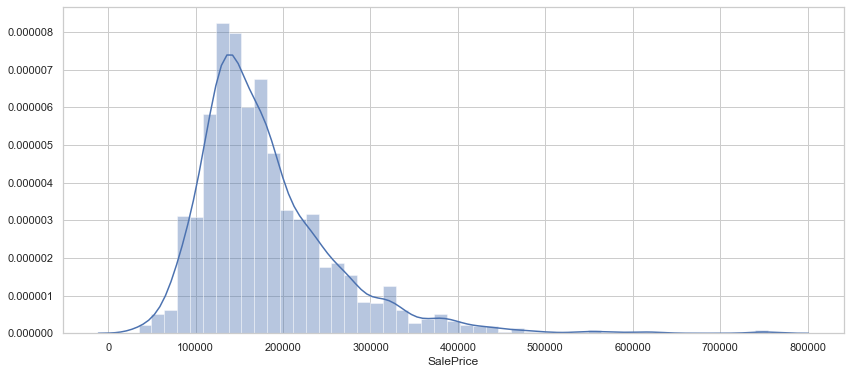

In [176]:
# 타겟 변수 로그 변환
fig=plt.gcf()  
fig.set_size_inches(14,6)
sns.distplot(train['SalePrice'])
print('Skewness: %f' % train['SalePrice'].skew())
print('Skewness: %f' % train['SalePrice'].kurt())

Skewness: -0.032026
Kurtosis: 0.571897


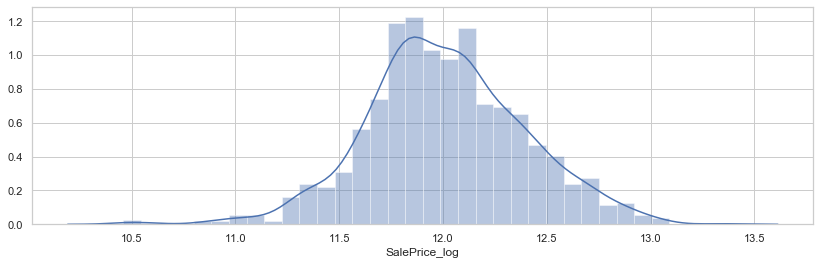

In [177]:
train_fe['SalePrice_log'] = train_fe['SalePrice'].map(lambda i:np.log(i) if i > 0 else 0)

fig=plt.gcf()  
fig.set_size_inches(14,4)

sns.distplot(train_fe['SalePrice_log'])
print('Skewness: %f' % train_fe['SalePrice_log'].skew())
print('Kurtosis: %f' % train_fe['SalePrice_log'].kurt())

#로그 취하니 정규 근사화

train_fe.drop('SalePrice', axis = 1, inplace = True) #기존 salePrice는 제거

In [199]:
numerical_fe = train_fe.dtypes[(train_fe.dtypes == 'int64') | (train_fe.dtypes =='float64')]
numerical_fe

OverallQual            int64
YearBuilt              int64
YearRemodAdd           int64
TotalBsmtSF            int64
1stFlrSF               int64
GrLivArea              int64
FullBath               int64
TotRmsAbvGrd           int64
Fireplaces             int64
GarageCars             int64
GarageArea             int64
SalePrice_log        float64
MasVnrArea_log       float64
GarageYrBlt_log      float64
ExterQual_num          int64
BsmtQual_num           int64
price_group_2_num      int64
dtype: object

In [182]:
from scipy.stats import skew
skewness = train_fe[numerical_fe.index].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

skewness
#일반적으로 왜도는 절대값 2~3을 넘지 않을 때 정규성 가정을 충족시킨다고 보므로, SalePrice와 마찬가지로 왜도가 2를 넘는 지표들은 로그 변환
print(skewness[abs(skewness) > 1])

MasVnrArea     2.699167
GarageYrBlt   -4.177266
dtype: float64


In [183]:
train_fe['MasVnrArea_log'] = train_fe['MasVnrArea'].map(lambda i:np.log(i) if i > 0 else 0)
print('Skewness: %f' % train_fe['MasVnrArea_log'].skew())
print('Kurtosis: %f' % train_fe['MasVnrArea_log'].kurt())

train_fe['GarageYrBlt_log'] = train_fe['GarageYrBlt'].map(lambda i:np.log(i) if i > 0 else 0)
print('Skewness: %f' % train_fe['GarageYrBlt_log'].skew())
print('Kurtosis: %f' % train_fe['GarageYrBlt_log'].kurt())

train_fe.drop(['MasVnrArea','GarageYrBlt'], axis = 1, inplace = True)

Skewness: 0.485912
Kurtosis: -1.638568
Skewness: -4.203807
Kurtosis: 15.696673


### 범주형 변후 Encoding (수치형 변환)

인코딩 하는 방식 두 가지 사용,
- 서열 변수는 레이블 인코딩으로(ExterQual, BsmtQual, price_group), 다른 명명척도 변수는 one-hot encoding으로 진행


1) Label encoding
: 숫자 값으로 일괄 변환, 숫자의 크고 작음에 대한 특성이 작용. 따라서 선형회귀 등에는 적용하지 않는 것이 좋음(트리 계열은 괜찮음)
eg. 남/여 -> 1, 2

2) One-hot encoding
: feature 값의 유형에 따라 고유 값에 해당하는 컬럼에만 1을 표시하고, 나머지는 0을 표시하는 방법
eg. 남/여 -> (1,0), (0,1)


[출처]
- https://medium.com/@john_analyst/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%A0%88%EC%9D%B4%EB%B8%94-%EC%9D%B8%EC%BD%94%EB%94%A9%EA%B3%BC-%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9-f0220df21df1
- https://2-chae.github.io/category/1.ai/30

In [186]:
# train_fe.dtypes
categorical_fe = train_fe.dtypes[train_fe.dtypes == 'object'].index

In [187]:
for i in list(train_fe[categorical_fe]):
    print('*'*50)
    print(train_fe[i].value_counts())

**************************************************
RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
**************************************************
None    1259
Grvl      42
Pave      37
Name: Alley, dtype: int64
**************************************************
NAmes      205
CollgCr    149
OldTown     93
Edwards     92
Somerst     85
Gilbert     79
NridgHt     71
Sawyer      68
NWAmes      66
BrkSide     56
SawyerW     54
Mitchel     46
Crawfor     44
NoRidge     37
IDOTRR      33
Timber      32
StoneBr     21
SWISU       20
ClearCr     19
Blmngtn     17
BrDale      16
MeadowV     15
Veenker     10
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
**************************************************
Norm      1165
Feedr       70
Artery      42
RRAn        24
PosN        12
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
************************************************

In [188]:
# Label encoding

# ExterQual
train_fe['ExterQual_num'] = 1
train_fe.loc[train_fe['ExterQual']=='TA', 'ExterQual_num'] = 2
train_fe.loc[train_fe['ExterQual']=='Gd', 'ExterQual_num'] = 3
train_fe.loc[train_fe['ExterQual']=='Ex', 'ExterQual_num'] = 4

# BsmtQual
train_fe['BsmtQual_num'] = 0
train_fe.loc[train_fe['BsmtQual']=='Po', 'BsmtQual_num'] = 1
train_fe.loc[train_fe['BsmtQual']=='Fa', 'BsmtQual_num'] = 2
train_fe.loc[train_fe['BsmtQual']=='TA', 'BsmtQual_num'] = 3
train_fe.loc[train_fe['BsmtQual']=='Gd', 'BsmtQual_num'] = 4
train_fe.loc[train_fe['BsmtQual']=='Ex', 'BsmtQual_num'] = 5


# price_group_2
train_fe['price_group_2_num'] = 1
train_fe.loc[train_fe['price_group_2']=='between_1Q_2Q', 'price_group_2_num'] = 2
train_fe.loc[train_fe['price_group_2']=='between_2Q_3Q', 'price_group_2_num'] = 3
train_fe.loc[train_fe['price_group_2']=='over_3Q', 'price_group_2_num'] = 4

train_fe[['ExterQual_num','BsmtQual_num','price_group_2_num']].describe()


ExterQual_num  BsmtQual_num  price_group_2_num
count    1338.000000   1338.000000        1338.000000
mean        2.393871      3.501495           2.348281
std         0.554731      0.855488           1.093840
min         1.000000      0.000000           1.000000
25%         2.000000      3.000000           1.000000
50%         2.000000      4.000000           2.000000
75%         3.000000      4.000000           3.000000
max         4.000000      5.000000           4.000000

In [271]:
#one-hot-encoding
one_hot_encoded = pd.get_dummies(train_fe[['MSZoning', 'Alley', 'Neighborhood', 'Condition1', 'Condition2',
       'MasVnrType', 'Foundation', 'CentralAir',
       'Electrical', 'SaleType', 'SaleCondition']])

train_fe = pd.concat([train_fe,one_hot_encoded], axis = 1)

### 새로운 변수 생성

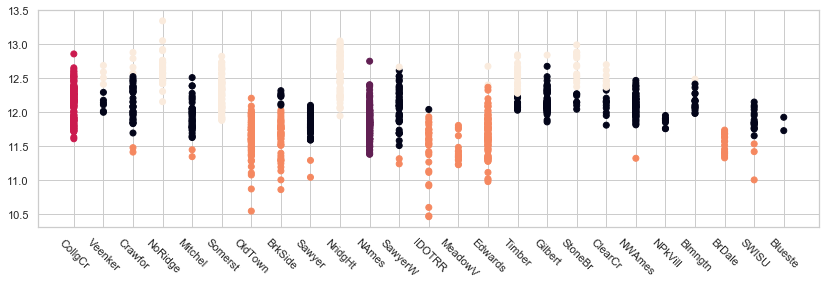

In [190]:
#가격 그룹 - 새로운 군집화 기준 그룹

from sklearn.cluster import KMeans

price_group_kmeans_df = train_fe[['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
 'Neighborhood_Timber', 'Neighborhood_Veenker', 'SalePrice_log']] 

model = KMeans(n_clusters=5, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(price_group_kmeans_df)
 
# 3. 클러스터링(군집) 결과
pred = model.predict(price_group_kmeans_df)
pred

# 4. 군집결과 시각화
fig=plt.gcf()  
fig.set_size_inches(14,4)
plt.xticks(rotation = - 45 )
plt.scatter(x=train_fe['Neighborhood'], y=train_fe['SalePrice_log'], c=pred)

In [191]:
train_fe['price_group_3'] = pred
train_fe[['Neighborhood','price_group_3']]

Neighborhood  price_group_3
0         CollgCr              2
1         Veenker              0
2         CollgCr              2
3         Crawfor              0
4         NoRidge              4
...           ...            ...
1333      Gilbert              0
1334       NWAmes              0
1335      Crawfor              0
1336        NAmes              1
1337      Edwards              3

[1338 rows x 2 columns]

In [192]:
train_fe.columns.to_list()

['MSZoning',
 'Alley',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'TotalBsmtSF',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'SaleType',
 'SaleCondition',
 'DateSold',
 'price_group',
 'price_group_2',
 'SalePrice_log',
 'MasVnrArea_log',
 'GarageYrBlt_log',
 'ExterQual_num',
 'BsmtQual_num',
 'price_group_2_num',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighbor

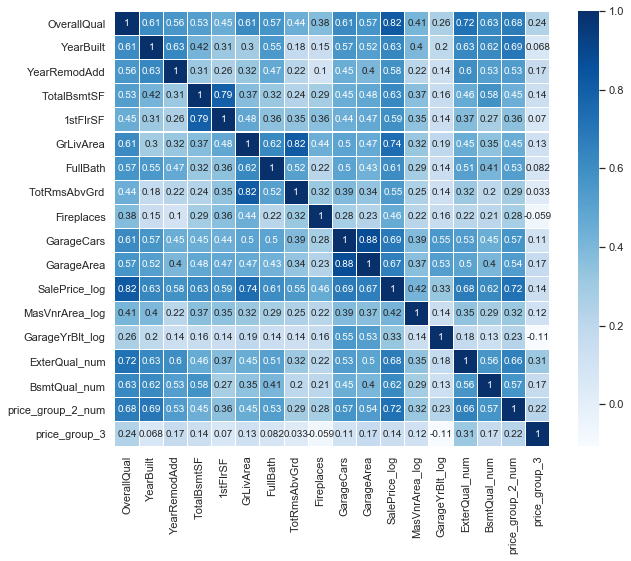

In [210]:
#선택된 numerical 변수들의 다중공선성 확인
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(train_fe[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'SalePrice_log', 'MasVnrArea_log', 'GarageYrBlt_log',
       'ExterQual_num', 'BsmtQual_num', 'price_group_2_num','price_group_3']].corr(), annot=True, square = True,linewidths = 0.1, cmap = 'Blues', linecolor = "white")

GrLivArea와 TotRmsAbvGrd사이의 상관이 높아 다중공선성이 우려됨. <br>
일반회귀를 돌릴 때는 타겟 변수인 SalePrice_log와 상관이 더 높은 GrLivArea를 채택하여 진행해야 하지만, <br>
다중공선성에 상대적으로 Robust한 Ridge회귀 기반의 LASSO, Elastic Net Regression의 경우에는 모두포함 가능

[출처]
- https://brunch.co.kr/@itschloe1/11
- https://pdfs.semanticscholar.org/5f37/f61a2869d15a89e15a63589d3b95758052a4.pdf

In [250]:
#날짜 변수 time으로 변경

def date_to_int(datesold):
    return datesold.value

train_fe['DateSold'] = train_fe['DateSold'].apply(date_to_int)

## Modeling

모델링할 데이터 만들기

1) 전체 데이터를 한 번에 트레이닝  <br>
2) 데이터 그룹별로 쪼개서 트레이닝<br>

In [251]:
#가격 변수를 나눈 다른 기준에 따라 나누었기 때문에, 그 기준별로 2가지의 데이터 셋을 가지고 training할 예정

#1) 표준편차를 기준으로 나눈 그룹
col_list_sd = [ 'OverallQual', 'YearBuilt', 'YearRemodAdd',
    'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars', 'GarageArea', 'DateSold', 'SalePrice_log',
    'MasVnrArea_log', 'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num',
    'price_group_2_num', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
    'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
    'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
    'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
    'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
    'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
    'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
    'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
    'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
    'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
    'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
    'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
    'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
    'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
    'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock',
    'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
    'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA',
    'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
    'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD', 'SaleType_CWD',
    'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
    'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
    'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
    'SaleCondition_Normal', 'SaleCondition_Partial']

train_fe_sd = train_fe[col_list_sd]

# print(pd.DataFrame(train_fe_sd.dtypes).head(30))

col_list_km = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd',
    'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars', 'GarageArea', 'DateSold', 'SalePrice_log',
    'MasVnrArea_log', 'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num',
    'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
    'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
    'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
    'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
    'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
    'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
    'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
    'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
    'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
    'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
    'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
    'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
    'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
    'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
    'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
    'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
    'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock',
    'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
    'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA',
    'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
    'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD', 'SaleType_CWD',
    'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
    'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
    'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
    'SaleCondition_Normal', 'SaleCondition_Partial','price_group_3'
]
train_fe_km = train_fe[col_list_km]

# print(pd.DataFrame(train_fe_km.dtypes).head(30))

#선형회귀 용은 다중공선성 우려되는 변수 제거
train_fe_sd_lm = train_fe[col_list_sd]


train_fe_km_lm = train_fe[col_list_km]

### Data Split- train, test

In [252]:
from sklearn.model_selection import train_test_split

train_fe_sd_train, train_fe_sd_test = train_test_split(train_fe_sd, test_size=0.2, shuffle = True, random_state=0)
train_fe_sd_train.shape, train_fe_sd_test.shape


((1070, 99), (268, 99))

In [253]:
train_fe_km_train, train_fe_km_test = train_test_split(train_fe_km, test_size=0.2, shuffle = True, random_state=0)
train_fe_km_train.shape, train_fe_km_test.shape

((1070, 99), (268, 99))

In [254]:
train_fe_sd_lm_train, train_fe_sd_lm_test = train_test_split(train_fe_sd_lm, test_size=0.2, shuffle = True, random_state=0)
print(train_fe_sd_lm_train.shape, train_fe_sd_lm_test.shape)

train_fe_km_lm_train, train_fe_km_lm_test = train_test_split(train_fe_km_lm, test_size=0.2, shuffle = True, random_state=0)
print(train_fe_km_lm_train.shape, train_fe_km_lm_test.shape)


(1070, 98) (268, 98)
(1070, 99) (268, 99)


### 1) 전체 데이터를 한 번에 트레이닝

### Modeling

In [230]:
#[출처] 
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Modelling
#https://www.kaggle.com/munmun2004/house-prices-for-begginers

In [228]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [295]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.linear_model import Ridge, LinearRegression

In [231]:
#교차검증 함수

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### 0. 단순 선형회귀

In [258]:
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

In [288]:
train_fe_sd_lm_train_x = train_fe_sd_lm_train[col_list_sd]

train_fe_sd_lm_train_y = train_fe_sd_lm_train['SalePrice_log']


In [316]:
train_fe_sd_lm_train['intercept'] = 1

lm = sm.OLS(train_fe_sd_lm_train['SalePrice_log'], train_fe_sd_lm_train[['OverallQual', 'GrLivArea','price_group_2_num']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          SalePrice_log   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.038e+04
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                        0.00
Time:                        21:08:17   Log-Likelihood:                         -2355.4
No. Observations:                1070   AIC:                                      4717.
Df Residuals:                    1067   BIC:                                      4732.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
OverallQual           1.8961      0.055     34.623      0.000       1.789       2.004
GrLivArea             0.0010      0.000      5.567      0.000       0.001       0.001
price_group_2_num    -0.6353      0.081     -7.891      0.000      -0.793      -0.477
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.922
Skew:                          -0.059   Prob(JB):                        0.383
Kurtosis:                       3.170   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
train_fe_sd_lm_train['intercept'] = 1

train_fe_sd_lm_train_2 = train_fe_sd_lm_train[col_list_sd]


lm = sm.OLS(train_fe_sd_lm_train['SalePrice_log'], train_fe_sd_lm_train_2)

results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     118.8
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:25:17   Log-Likelihood:                 787.82
No. Observations:                1070   AIC:                            -1410.
Df Residuals:                     987   BIC:                            -996.7
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
OverallQual               0.0634      0.006     11.254      0.000       0.052       0.074
YearBuilt                 0.0012      0.000      3.062      0.002       0.000       0.002
YearRemodAdd              0.0017      0.000      6.273      0.000       0.001       0.002
TotalBsmtSF               0.0001   2.41e-05      5.522      0.000    8.57e-05       0.000
1stFlrSF               2.988e-06   2.54e-05      0.118      0.906   -4.68e-05    5.28e-05
GrLivArea                 0.0003   1.46e-05     18.372      0.000       0.000       0.000
FullBath                 -0.0093      0.012     -0.809      0.419      -0.032       0.013
Fireplaces                0.0358      0.008      4.721      0.000       0.021       0.051
GarageCars                0.0135      0.013      1.042      0.298      -0.012       0.039
GarageArea                0.0002   4.34e-05      4.195      0.000    9.68e-05       0.000
MasVnrArea_log            0.0037      0.007      0.531      0.595      -0.010       0.017
GarageYrBlt_log           0.0058      0.003      1.899      0.058      -0.000       0.012
ExterQual_num             0.0134      0.012      1.125      0.261      -0.010       0.037
BsmtQual_num              0.0219      0.009      2.490      0.013       0.005       0.039
price_group_2_num         0.1651      0.028      5.984      0.000       0.111       0.219
MSZoning_C (all)         -0.0261      0.085     -0.307      0.759      -0.193       0.141
MSZoning_FV               0.5510      0.076      7.204      0.000       0.401       0.701
MSZoning_RH               0.4993      0.075      6.651      0.000       0.352       0.647
MSZoning_RL               0.5171      0.069      7.492      0.000       0.382       0.653
MSZoning_RM               0.4373      0.073      6.013      0.000       0.295       0.580
Alley_Grvl                0.6835      0.113      6.023      0.000       0.461       0.906
Alley_None                0.6485      0.115      5.627      0.000       0.422       0.875
Alley_Pave                0.6466      0.117      5.528      0.000       0.417       0.876
Neighborhood_Blmngtn     -0.0912      0.038     -2.419      0.016      -0.165      -0.017
Neighborhood_Blueste      0.0954      0.088      1.078      0.281      -0.078       0.269
Neighborhood_BrDale       0.1616      0.062      2.606      0.009       0.040       0.283
Neighborhood_BrkSide      0.3702      0.047      7.830      0.000       0.277       0.463
Neighborhood_ClearCr     -0.0199      0.041     -0.480      0.631      -0.101       0.061
Neighborhood_CollgCr     -0.0260      0.014     -1.797      0.073      -0.054       0.002
Neighborhood_Crawfor      0.1290      0.024      5.391      0.000       0.082       0.176
Neighborhood_Edwards      0.2763      0.053      5.197      0.000       0.172       0.381
Neighborhood_Gilbert   

In [347]:
#다중공선성

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = train_fe_sd_lm_train_2.columns

vif['vif'] = [
    variance_inflation_factor(train_fe_sd_lm_train_2.values, i)
    for i in range(train_fe_sd_lm_train_2.shape[1])
]

vif.sort_values(by='vif', ascending = False).head(30)

#엄청난 다중공선성..!!

Features  vif
47   Neighborhood_Veenker  inf
60        Condition2_PosN  inf
69       Foundation_PConc  inf
68      Foundation_CBlock  inf
67      Foundation_BrkTil  inf
66       MasVnrType_Stone  inf
65        MasVnrType_None  inf
64     MasVnrType_BrkFace  inf
63      MasVnrType_BrkCmn  inf
62        Condition2_RRNn  inf
61        Condition2_RRAn  inf
59        Condition2_Norm  inf
48      Condition1_Artery  inf
58       Condition2_Feedr  inf
57      Condition2_Artery  inf
56        Condition1_RRNn  inf
55        Condition1_RRNe  inf
54        Condition1_RRAn  inf
53        Condition1_RRAe  inf
52        Condition1_PosN  inf
51        Condition1_PosA  inf
50        Condition1_Norm  inf
70        Foundation_Slab  inf
71       Foundation_Stone  inf
72        Foundation_Wood  inf
73           CentralAir_N  inf
94   SaleCondition_Normal  inf
93   SaleCondition_Family  inf
92   SaleCondition_Alloca  inf
91  SaleCondition_AdjLand  inf

#### 1. Ridge Regression 

In [284]:
train_fe_sd_train_x = train_fe_sd_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log',
       'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num', 'price_group_2_num',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRAn',
       'Condition2_RRNn', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]

train_fe_sd_train_y = train_fe_sd_train['SalePrice_log']

train_fe_sd_test_x = train_fe_sd_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log',
       'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num', 'price_group_2_num',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRAn',
       'Condition2_RRNn', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]

train_fe_sd_test_y = train_fe_sd_t['SalePrice_log']


In [405]:
train_fe_km_train_x = train_fe_km_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log',
       'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'price_group_3']]
    
train_fe_km_train_y = train_fe_km_train['SalePrice_log']

train_fe_km_test_x = train_fe_km_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log',
       'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'price_group_3']]
    
train_fe_km_test_y = train_fe_km_test['SalePrice_log']

In [298]:
ridge = Ridge()
ridge.fit(train_fe_sd_train_x, train_fe_sd_train_y)

print('ridge score of train_set(sd):','{:.3f}'.format(ridge.score(train_fe_sd_train_x, train_fe_sd_train_y)))
print('ridge score of test_set(sd):','{:.3f}'.format(ridge.score(train_fe_sd_test_x, train_fe_sd_test_y)))


ridge score of train_set(sd): 0.908
ridge score of train_set(sd): 0.882


In [305]:
#설명력에 거의 차이 없음
ridge = Ridge()
ridge.fit(train_fe_km_train_x, train_fe_km_train_y)

print('ridge score of train_set(km):','{:.3f}'.format(ridge.score(train_fe_km_train_x, train_fe_km_train_y)))
print('ridge score of test_set(km):','{:.3f}'.format(ridge.score(train_fe_km_test_x, train_fe_km_test_y)))

ridge score of train_set(km): 0.908
ridge score of train_set(km): 0.881


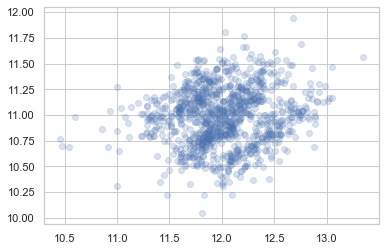

In [361]:
y_hat_ridge = ridge.predict(train_fe_sd_train_x)

plt.scatter(train_fe_sd_train_y, y_hat_ridge, alpha = 0.2)
plt.show()

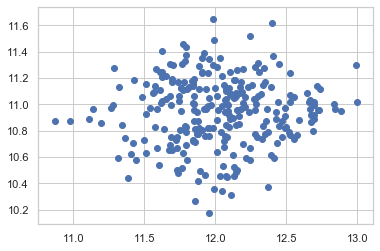

In [365]:
y_hat_ridge = ridge.predict(train_fe_sd_test_x)

plt.scatter(train_fe_sd_test_y, y_hat_ridge, alpha = 0.2)
plt.show()

#### 2. LASSO Regression 

<b> LASSO Regression : </b>
LASSO 회귀 모델은 Ridge의 변형으로 ~~

In [308]:
lasso = Lasso()
lasso.fit(train_fe_sd_train_x, train_fe_sd_train_y)

print('lasso score of train_set(sd):','{:.3f}'.format(lasso.score(train_fe_sd_train_x, train_fe_sd_train_y)))
print('lasso score of test_set(sd):','{:.3f}'.format(lasso.score(train_fe_sd_test_x, train_fe_sd_test_y)))


ridge score of train_set(sd): 0.802
ridge score of train_set(sd): 0.807


In [389]:
lasso.fit(train_fe_km_train_x, train_fe_km_train_y)

print('lasso score of test_set(km):','{:.3f}'.format(lasso.score(train_fe_km_train_x, train_fe_km_train_y)))
print('lasso score of test_set(km):','{:.3f}'.format(lasso.score(train_fe_km_test_x, train_fe_km_test_y)))

lasso score of test_set(km): 0.802
lasso score of test_set(km): 0.807


#### 2. Elastic Net Regression 

In [311]:
elasticnet = ElasticNet()
elasticnet.fit(train_fe_sd_train_x, train_fe_sd_train_y)

print('elasticnet score of train_set(sd):','{:.3f}'.format(elasticnet.score(train_fe_sd_train_x, train_fe_sd_train_y)))
print('elasticnet score of train_set(sd):','{:.3f}'.format(elasticnet.score(train_fe_sd_test_x, train_fe_sd_test_y)))


elasticnet score of train_set(sd): 0.817
elasticnet score of train_set(sd): 0.823


In [390]:
elasticnet.fit(train_fe_km_train_x, train_fe_km_train_y)

print('lasso score of test_set(km):','{:.3f}'.format(elasticnet.score(train_fe_km_train_x, train_fe_km_train_y)))
print('lasso score of test_set(km):','{:.3f}'.format(elasticnet.score(train_fe_km_test_x, train_fe_km_test_y)))

lasso score of test_set(km): 0.817
lasso score of test_set(km): 0.823


확실히 Ridge보다 LASSO,ElasticNet 모델에서 보여주는 coef의 차이가 확연함. <br>
변수들간의 coef 차이가 LASSO, ElasticNet모델에서는 Ridge에 비해서 훨씬 더 극명하게 나타남

#### 3. XGBoost

In [419]:
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(train_fe_sd_train_x,train_fe_sd_train_y)

[00:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=1.8, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, ntrhead=-1, objective='reg:linear',
             random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.52, verbosity=1)

In [348]:
print('XGBoost score of train_set(sd):','{:.3f}'.format(regressor.score(train_fe_sd_train_x, train_fe_sd_train_y)))
print('XGBoost score of test_set(sd):','{:.3f}'.format(regressor.score(train_fe_sd_test_x, train_fe_sd_test_y)))

XGBoost score of train_set(sd): 0.995
XGBoost score of test_set(sd): 0.868


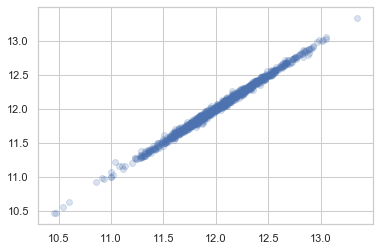

In [363]:
y_hat = regressor.predict(train_fe_sd_train_x)

plt.scatter(train_fe_sd_train_y, y_hat, alpha = 0.2)
plt.show()

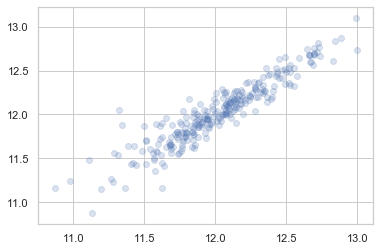

In [364]:
y_hat_test = regressor.predict(train_fe_sd_test_x)

plt.scatter(train_fe_sd_test_y, y_hat_test, alpha = 0.2)
plt.show()

<b> Results : </b>
어떻게 군집을 나누거나 그룹화를 하던 설명력에 별 차이가 없었고, test셋에 대한 예측력은 ElasticNet모델 & XGBoost가 좋았음

#### 교차검증

In [355]:
#k-fold validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = train_fe_sd_train_x, y = train_fe_sd_train_y, cv = 10)

[21:33:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [356]:
print(accuracies.mean())
print(accuracies.std())

0.87885494837311
0.019850056911106043


In [357]:
#k-fold validation
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = ridge, X = train_fe_sd_train_x, y = train_fe_sd_train_y, cv = 10)

In [358]:
print(accuracies2.mean())
print(accuracies2.std())

0.8862482816440685
0.01803880116046758


### 2) 가격 그룹별로 트레이닝

In [370]:
price_group_under_1Q = train_fe_sd[train_fe_sd['price_group_2_num'] == 1]
price_group_between_1Q_2Q = train_fe_sd[train_fe_sd['price_group_2_num'] == 2]
price_group_between_2Q_3Q = train_fe_sd[train_fe_sd['price_group_2_num'] == 3]
price_group_over_3Q = train_fe_sd[train_fe_sd['price_group_2_num'] == 4]

In [373]:
under_1Q_train, under_1Q_test = train_test_split(price_group_under_1Q,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=0)
print(under_1Q_train.shape, under_1Q_test.shape)

between_1Q_2Q_train, between_1Q_2Q_test = train_test_split(price_group_between_1Q_2Q,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=0)
print(between_1Q_2Q_train.shape, between_1Q_2Q_test.shape)

between_2Q_3Q_train, between_2Q_3Q_test = train_test_split(price_group_between_2Q_3Q,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=0)
print(between_2Q_3Q_train.shape, between_2Q_3Q_test.shape)

over_3Q_train, over_3Q_test = train_test_split(price_group_over_3Q,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 random_state=0)
print(over_3Q_train.shape, over_3Q_test.shape)

(298, 99) (75, 99)
(320, 99) (81, 99)
(231, 99) (58, 99)
(220, 99) (55, 99)


In [400]:
x_col = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log',
       'GarageYrBlt_log', 'ExterQual_num', 'BsmtQual_num', 'price_group_2_num',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRAn',
       'Condition2_RRNn', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_None', 'Electrical_SBrkr', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

under_1Q_train_x = under_1Q_train[x_col]
under_1Q_train_y = under_1Q_train['SalePrice_log']

under_1Q_test_x = under_1Q_test[x_col]
under_1Q_test_y = under_1Q_test['SalePrice_log']

between_1Q_2Q_train_x = between_1Q_2Q_train[x_col]
between_1Q_2Q_train_y = between_1Q_2Q_train['SalePrice_log']

between_1Q_2Q_test_x = between_1Q_2Q_test[x_col]
between_1Q_2Q_test_y = between_1Q_2Q_test['SalePrice_log']

between_2Q_3Q_train_x = between_2Q_3Q_train[x_col]
between_2Q_3Q_train_y = between_2Q_3Q_train['SalePrice_log']

between_2Q_3Q_test_x = between_2Q_3Q_test[x_col]
between_2Q_3Q_test_y = between_2Q_3Q_test['SalePrice_log']

over_3Q_train_x = over_3Q_train[x_col]
over_3Q_train_y = over_3Q_train['SalePrice_log']

over_3Q_test_x = over_3Q_test[x_col]
over_3Q_test_y = over_3Q_test['SalePrice_log']

#### 1. Ridge Regression

In [385]:
ridge = Ridge()
ridge.fit(under_1Q_train_x, under_1Q_train_y)

print('ridge score of train_set(km):','{:.3f}'.format(ridge.score(under_1Q_train_x, under_1Q_train_y)))
print('ridge score of test_set(km):','{:.3f}'.format(ridge.score(under_1Q_test_x, under_1Q_test_y)))

ridge score of train_set(km): 0.814
ridge score of test_set(km): 0.563


In [386]:
ridge = Ridge()
ridge.fit(between_1Q_2Q_train_x, between_1Q_2Q_train_y)

print('ridge score of train_set(km):','{:.3f}'.format(ridge.score(between_1Q_2Q_train_x, between_1Q_2Q_train_y)))
print('ridge score of test_set(km):','{:.3f}'.format(ridge.score(between_1Q_2Q_test_x, between_1Q_2Q_test_y)))

ridge score of train_set(km): 0.817
ridge score of test_set(km): 0.747


In [387]:
ridge = Ridge()
ridge.fit(between_2Q_3Q_train_x, between_2Q_3Q_train_y)

print('ridge score of train_set(km):','{:.3f}'.format(ridge.score(between_2Q_3Q_train_x, between_2Q_3Q_train_y)))
print('ridge score of test_set(km):','{:.3f}'.format(ridge.score(between_2Q_3Q_test_x, between_2Q_3Q_test_y)))

ridge score of train_set(km): 0.890
ridge score of test_set(km): 0.819


In [388]:
ridge = Ridge()
ridge.fit(over_3Q_train_x, over_3Q_train_y)

print('ridge score of train_set(km):','{:.3f}'.format(ridge.score(over_3Q_train_x, over_3Q_train_y)))
print('ridge score of test_set(km):','{:.3f}'.format(ridge.score(over_3Q_test_x, over_3Q_test_y)))

ridge score of train_set(km): 0.858
ridge score of test_set(km): 0.887


#### 5. XGBoost


In [391]:
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(under_1Q_train_x,under_1Q_train_y)

[21:55:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=1.8, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, ntrhead=-1, objective='reg:linear',
             random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.52, verbosity=1)

In [392]:
print('XGBoost score of train_set(sd):','{:.3f}'.format(regressor.score(under_1Q_train_x, under_1Q_train_y)))
print('XGBoost score of test_set(sd):','{:.3f}'.format(regressor.score(under_1Q_test_x, under_1Q_test_y)))

XGBoost score of train_set(sd): 1.000
XGBoost score of test_set(sd): 0.550


In [403]:
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(between_1Q_2Q_train_x,between_1Q_2Q_train_y)

print('XGBoost score of train_set(sd):','{:.3f}'.format(regressor.score(between_1Q_2Q_train_x, between_1Q_2Q_train_y)))
print('XGBoost score of test_set(sd):','{:.3f}'.format(regressor.score(between_1Q_2Q_test_x, between_1Q_2Q_test_y)))

[00:00:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost score of train_set(sd): 1.000
XGBoost score of test_set(sd): 0.746


In [407]:
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(between_2Q_3Q_train_x,between_2Q_3Q_train_y)

print('XGBoost score of train_set(sd):','{:.3f}'.format(regressor.score(between_2Q_3Q_train_x, between_2Q_3Q_train_y)))
print('XGBoost score of test_set(sd):','{:.3f}'.format(regressor.score(between_2Q_3Q_test_x, between_2Q_3Q_test_y)))

[00:02:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost score of train_set(sd): 1.000
XGBoost score of test_set(sd): 0.806


Ridge, XGBoost 모두 데이터 셋이 충분할 때 예측력이 잘 나오는 모델들이라서 쪼개면 설명력이 떨어짐 <br>
특히 XGBoost에서 과적합되어 예측력이 하락하는 이슈 발생

### 결과 해석

- LASSO, ElasticNet에서는 건축 연도와 리모델링 연도, 지상 면적이 가장 예측력이 높은 변수였고,
- 모델 예측력이 가장 높았던 XGBoost에서는 면적 관련 변수의 중요도가 가장 높았음

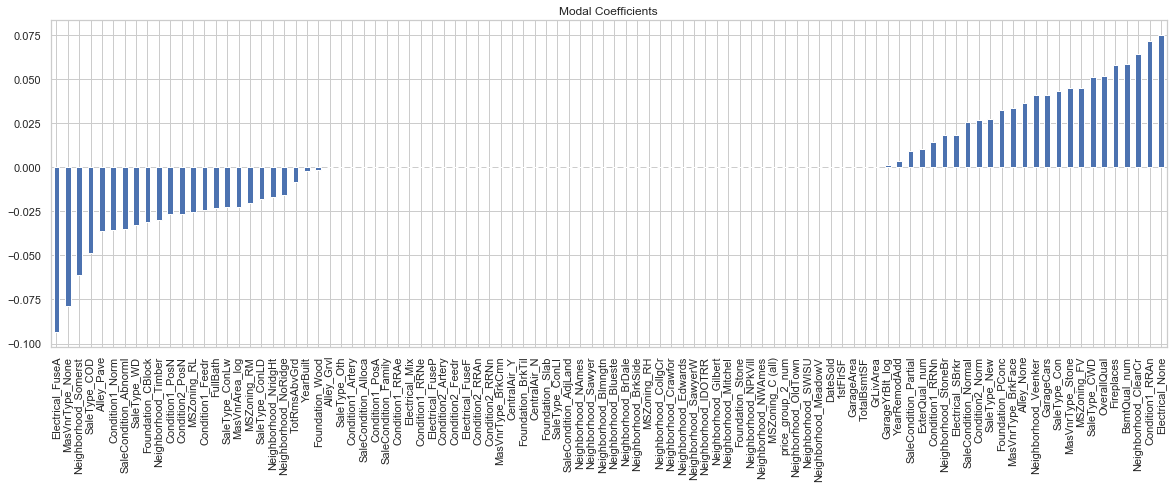

In [411]:
#Ridge
from pandas import Series, DataFrame

fig=plt.gcf()  
fig.set_size_inches(20,6)
plt.xticks(rotation = - 45 )

predictors = train_fe_sd_train_x.columns
coef = Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

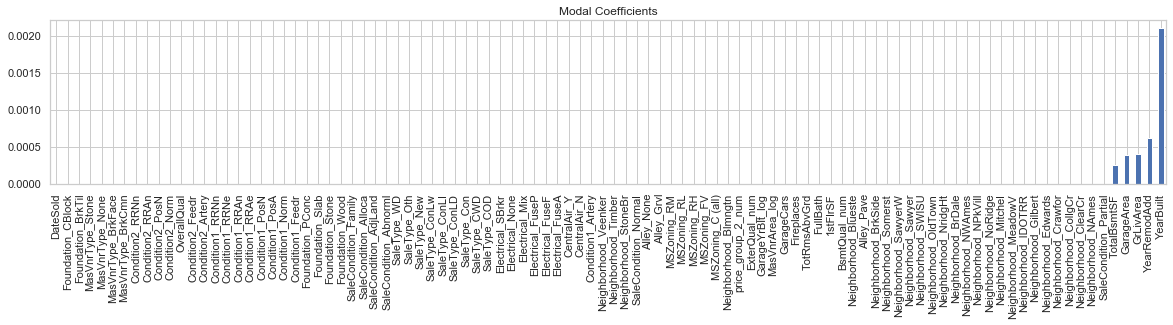

In [430]:
#LASSO
fig=plt.gcf()  
fig.set_size_inches(20,3)

predictors = train_fe_sd_train_x.columns
coef = Series(lasso.coef_,predictors).sort_values()
# coef

coef.plot(kind='bar', title='Modal Coefficients')


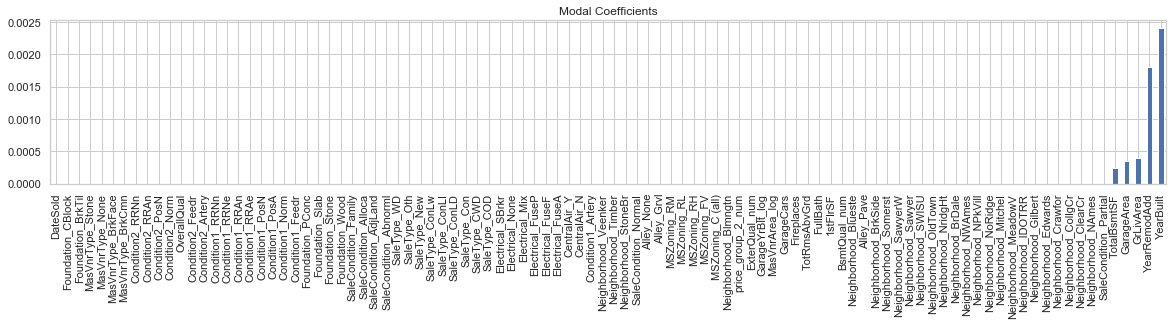

In [432]:
#ElasticNet

fig=plt.gcf()  
fig.set_size_inches(20,3)
predictors = train_fe_sd_train_x.columns
coef = Series(elasticnet.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

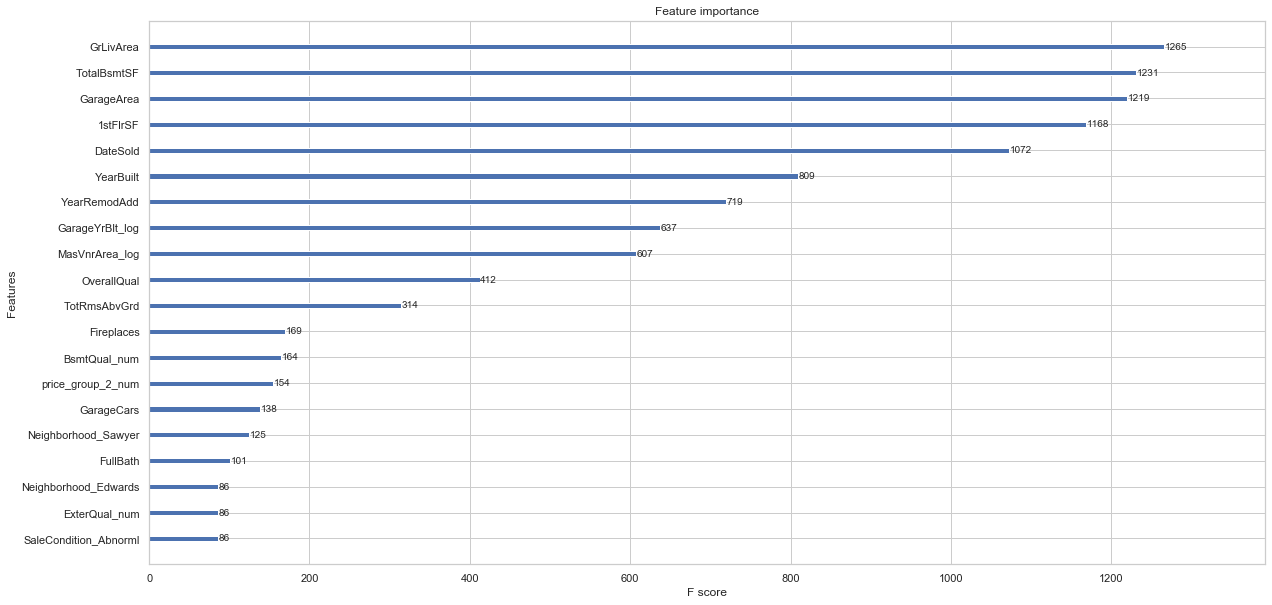

In [422]:
xgboost.plot_importance(regressor, max_num_features=20, show_values=True)
fig=plt.gcf()  
fig.set_size_inches(20,10)

- 모델 전반적으로 a) 면적 관련 변수, b) 건축 연도 관련 변수의 중요도가 높았음
- 예측력이 가장 높았던 XGBoost의 경우 면적 관련 변수의 중요도가 제일 높았고 그 다음으로 건축연도 관련 변수의 중요도가 높았음
- LASSO, ElasticNet에서는 건축연도 관련 변수의 coef가 제일 높았음

샘플 결과 알아보기

In [456]:
#가격이 가장 비쌌던(3Q이상) 그룹의 연도별 가격 예측치
over_3Q_df = train_fe_sd_test[train_fe_sd_test["price_group_2_num"] == 3].reset_index()
over_3Q_df["datesold_dt"] = pd.to_datetime(over_3Q_df["DateSold"])
over_3Q_df = over_3Q_df.set_index('datesold_dt')
over_3Q_df                             

index  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  \
datesold_dt                                                             
2007-07-01    1034            7       2004          2005          847   
2006-04-01     198            7       2006          2006         1498   
2006-06-01    1256            7       1998          1998         1108   
2008-07-01     406            7       1994          1995          915   
2009-03-01    1173            7       2002          2002         1573   
...            ...          ...        ...           ...          ...   
2007-07-01     884            6       2005          2007          783   
2010-06-01    1109            8       1988          2005          559   
2007-08-01     783            7       1941          1950          918   
2009-09-01     726            7       2005          2006         1145   
2007-10-01     963            7       2007          2007         1316   

             1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  \
datesold_dt                                                            
2007-07-01        847       1959         2             8           1   
2006-04-01       1498       1498         2             5           0   
2006-06-01       1108       2097         2             8           1   
2008-07-01        933       1908         2             8           1   
2009-03-01       1573       1573         2             6           0   
...               ...        ...       ...           ...         ...   
2007-07-01        783       1484         2             8           1   
2010-06-01       1080       1752         2             8           0   
2007-08-01        918       1646         2             7           2   
2009-09-01       1145       1145         2             5           1   
2007-10-01       1316       1316         2             6           1   

             GarageCars  GarageArea             DateSold  SalePrice_log  \
datesold_dt                                                               
2007-07-01            2         434  1183248000000000000      12.278393   
2006-04-01            2         675  1143849600000000000      12.230277   
2006-06-01            2         583  1149120000000000000      12.521978   
2008-07-01            2         493  1214870400000000000      12.254863   
2009-03-01            2         544  1235865600000000000      12.332705   
...                 ...         ...                  ...            ...   
2007-07-01            2         393  1183248000000000000      12.094582   
2010-06-01            2         492  1275350400000000000      12.007622   
2007-08-01            1         240  1185926400000000000      12.007622   
2009-09-01            2         397  1251763200000000000      11.984178   
2007-10-01            2         440  1191196800000000000      12.206777   

             MasVnrArea_log  GarageYrBlt_log  ExterQual_num  BsmtQual_num  \
datesold_dt                                                                 
2007-07-01         0.000000         7.602900              3             4   
2006-04-01         0.000000         7.603898              3             4   
2006-06-01         0.000000         7.599902              2             4   
2008-07-01         0.000000         7.597898              3             4   
2009-03-01         4.700480         7.601902              3             4   
...                     ...              ...            ...           ...   
2007-07-01         0.000000         7.603399              3             4   
2010-06-01         0.000000         7.594884              3             4   
2007-08-01         0.000000         7.570959              2             3   
2009-09-01         2.397895         7.603399              3             4   
2007-10-01         0.000000         7.604396              3             4   

             price_group_2_num  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
datesold_dt                                                           

In [468]:
#test셋의 데이터를 모두 2011년 1월 1일로 date변경해서 새로운 예측 대상값 생성
over_3Q_df_predict = train_fe_sd_test[train_fe_sd_test["price_group_2_num"] == 3]
over_3Q_df_predict["DateSold"] = '2011-01-01' 

def date_to_int(datesold):
    datesold = pd.to_datetime(datesold)
    return datesold.value

over_3Q_df_predict['DateSold'] = over_3Q_df_predict['DateSold'].apply(date_to_int)

over_3Q_df_predict = over_3Q_df_predict.drop('SalePrice_log', axis = 1)
over_3Q_df_predict = over_3Q_df_predict.drop('datesold_dt', axis = 1)

over_3Q_df_predict.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'DateSold', 'MasVnrArea_log', 'GarageYrBlt_log',
       'ExterQual_num', 'BsmtQual_num', 'price_group_2_num',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Ne

In [471]:
over_3Q_df_predict_result = over_3Q_df_predict
over_3Q_df_predict_result['SalePrice_log'] = regressor.predict(over_3Q_df_predict)

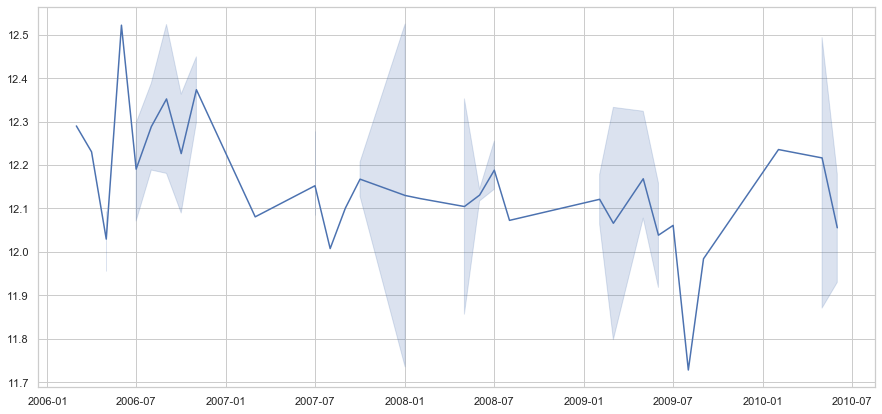

In [455]:
fig=plt.gcf()  
fig.set_size_inches(15,7)
sns.lineplot(data = over_3Q_df['SalePrice_log'], palette = 'tab10')

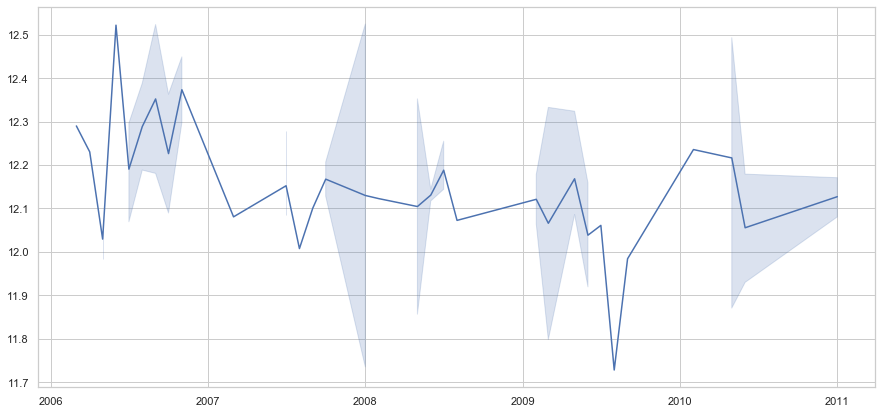

In [476]:
predict_df = pd.concat([train_fe_sd_test[train_fe_sd_test["price_group_2_num"] == 3],over_3Q_df_predict_result], axis = 0)

predict_df["datesold_dt"] = pd.to_datetime(predict_df["DateSold"])
predict_df = predict_df.set_index('datesold_dt')
predict_df                             

fig=plt.gcf()  
fig.set_size_inches(15,7)
sns.lineplot(data = predict_df['SalePrice_log'], palette = 'tab10')

샘플 결과 도출을 위해,
가격이 비쌌던 지역구(NoRidge, NridgHt, StoneBr, Timber, Veenker, Somerst, ClearCr)의 일부 데이터를 2011년으로 변경한 후 predict  값 추출
모델의 예측에 따르면, 2010년 평균치에 비해서 2011년도 주택 가격이 하락했기 떄문에 해당 지역구의 주택을 구매하지 않는 결정을 내림
